In [1]:
import numpy as np
import pandas as pd
import scipy
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import nltk
from nltk.corpus import gutenberg
nltk.download('gutenberg')
import re
from sklearn.model_selection import train_test_split

#reading in the data, this time in the form of paragraphs
emma=gutenberg.paras('austen-emma.txt')

#processing
emma_paras=[]
for paragraph in emma:
    para=paragraph[0]
    #removing the double-dash from all words
    para=[re.sub(r'--','',word) for word in para]
    #Forming each paragraph into a string and adding it to the list of strings.
    emma_paras.append(' '.join(para))

print(emma_paras[0:4])

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Martin\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
['[ Emma by Jane Austen 1816 ]', 'VOLUME I', 'CHAPTER I', 'Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her .']


In [11]:
emma_text = ''.join(emma_paras)

In [12]:
emma_text[:50]

'[ Emma by Jane Austen 1816 ]VOLUME ICHAPTER IEmma '

In [15]:
nlp = spacy.load('en')
#emma = ' '
#emma = emma.join(emma_paras)
emma_doc = nlp(emma_text)
##emma = [[sent, 'emma']for sent in emma.sents]

In [16]:
for token in emma_doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

[ [ PUNCT -LRB- punct [ False False
Emma emma PROPN NNP nmod Xxxx True False
by by ADP IN prep xx True True
Jane jane PROPN NNP compound Xxxx True False
Austen austen PROPN NNP pobj Xxxxx True False
1816 1816 NUM CD nummod dddd False False
] ] PUNCT -RRB- punct ] False False
VOLUME volume NOUN NN compound XXXX True False
ICHAPTER ichapter PROPN NNP compound XXXX True False
IEmma iemma PROPN NNP compound XXxxx True False
Woodhouse woodhouse PROPN NNP nsubj Xxxxx True False
, , PUNCT , punct , False False
handsome handsome ADJ JJ amod xxxx True False
, , PUNCT , punct , False False
clever clever ADJ JJ conj xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
rich rich ADJ JJ conj xxxx True False
, , PUNCT , punct , False False
with with ADP IN prep xxxx True True
a a DET DT det x True True
comfortable comfortable ADJ JJ amod xxxx True False
home home NOUN NN nmod xxxx True False
and and CCONJ CC cc xxx True True
happy happy ADJ JJ conj xxxx True False
dispos

It -PRON- PRON PRP nsubj Xx True False
was be VERB VBD ROOT xxx True True
true true ADJ JJ acomp xxxx True False
that that ADP IN mark xxxx True True
her -PRON- ADJ PRP$ poss xxx True True
friend friend NOUN NN nsubj xxxx True False
was be VERB VBD aux xxx True True
going go VERB VBG ccomp xxxx True False
only only ADV RB advmod xxxx True True
half half ADJ PDT quantmod xxxx True False
a a DET DT nummod x True True
mile mile NOUN NN npadvmod xxxx True False
from from ADP IN prep xxxx True True
them -PRON- PRON PRP pobj xxxx True True
; ; PUNCT : punct ; False False
but but CCONJ CC cc xxx True True
Emma emma PROPN NNP nsubj Xxxx True False
was be VERB VBD conj xxx True True
aware aware ADJ JJ acomp xxxx True False
that that ADP IN mark xxxx True True
great great ADJ JJ nsubj xxxx True False
must must VERB MD aux xxxx True True
be be VERB VB ccomp xx True True
the the DET DT det xxx True True
difference difference NOUN NN attr xxxx True False
between between ADP IN prep xxxx True True
a

RB advmod xxxx True True
amounting amount VERB VBG advcl xxxx True False
to to ADP IN prep xx True True
a a DET DT det x True True
town town NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
to to PART TO prep xx True True
which which ADJ WDT pobj xxxx True True
Hartfield hartfield PROPN NNP appos Xxxxx True False
, , PUNCT , punct , False False
in in ADP IN prep xx True True
spite spite NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
its -PRON- ADJ PRP$ poss xxx True True
separate separate ADJ JJ amod xxxx True False
lawn lawn NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
shrubberies shrubbery NOUN NNS conj xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
name name NOUN NN conj xxxx True True
, , PUNCT , punct , False False
did do VERB VBD aux xxx True True
really really ADV RB advmod xxxx True True
belong belong VERB VB conj xxxx True False
, , PUNCT , punct , False False
afforded

husband husband NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
Not not ADV RB neg Xxx True False
at at ADV RB advmod xx True True
all all ADV RB advmod xxx True True
, , PUNCT , punct , False False
sir sir NOUN NN ROOT xxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
But but CCONJ CC cc Xxx True False
you -PRON- PRON PRP nsubj xxx True True
must must VERB MD aux xxxx True True
have have VERB VB aux xxxx True True
found find VERB VBN ROOT xxxx True False
it -PRON- PRON PRP nsubj xx True True
very very ADV RB advmod xxxx True True
damp damp ADJ JJ ccomp xxxx True False
and and CCONJ CC cc xxx True True
dirty dirty ADJ JJ conj xxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
Dirty dirty ADJ JJ ROOT Xxxxx True False
, , PUNCT , punct , False False
sir sir NOUN NN npadvmod xxx True False
! ! PUNCT . punct ! False False
" " PUNCT '' punct " False False
Well well INTJ UH ROOT Xxxx Tru

subject subject NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
do do VERB VBP aux xx True True
not not ADV RB neg xxx True True
understand understand VERB VB ccomp xxxx True False
what what NOUN WP dobj xxxx True True
you -PRON- PRON PRP nsubj xxx True True
mean mean VERB VBP ccomp xxxx True False
by by ADP IN prep xx True True
` ` PUNCT '' punct ` False False
success success NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
' ' PUNCT '' punct ' False False
" " PUNCT '' punct " False False
said say VERB VBD ROOT xxxx True False
Mr mr PROPN NNP nsubj Xx True False
. . PUNCT . punct . False False
Knightley knightley PROPN NNP ROOT Xxxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
And and CCONJ CC cc Xxx True False
have have VERB VBP aux xxxx True True
you -PRON- PRON PRP nsubj xxx True True
never never ADV RB neg xxxx True True
known know VERB VBN ROOT xxxx True 

as asTrue False
since since ADP IN mark xxxx True True
Miss miss PROPN NNP compound Xxxx True False
Taylor taylor PROPN NNP nsubj Xxxxx True False
had have VERB VBD aux xxx True True
begun begin VERB VBN advcl xxxx True False
to to PART TO aux xx True True
influence influence VERB VB xcomp xxxx True False
his -PRON- ADJ PRP$ poss xxx True True
schemes scheme NOUN NNS dobj xxxx True False
; ; PUNCT : punct ; False False
but but CCONJ CC cc xxx True True
as as ADP IN mark xx True True
it -PRON- PRON PRP nsubj xx True True
was be VERB VBD advcl xxx True True
not not ADV RB neg xxx True True
the the DET DT det xxx True True
tyrannic tyrannic NOUN NN amod xxxx True False
influence influence NOUN NN attr xxxx True False
of of ADP IN prep xx True True
youth youth NOUN NN pobj xxxx True False
on on ADP IN prep xx True True
youth youth NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
it -PRON- PRON PRP nsubj xx True True
had have VERB VBD aux xxx True True
not not ADV RB neg xxx Tru

comfort comfort NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
or or CCONJ CC cc xx True True
saw see VERB VBD conj xxx True False
her -PRON- PRON PRP nsubj xxx True True
go go VERB VB ccomp xx True True
away away ADV RB advmod xxxx True False
in in ADP IN prep xx True True
the the DET DT det xxx True True
evening evening NOUN NN pobj xxxx True False
attended attend VERB VBN advcl xxxx True False
by by ADP IN agent xx True True
her -PRON- ADJ PRP$ poss xxx True True
pleasant pleasant ADJ JJ amod xxxx True False
husband husband NOUN NN pobj xxxx True False
to to ADP IN prep xx True True
a a DET DT det x True True
carriage carriage NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
her -PRON- ADJ PRP$ poss xxx True True
own own ADJ JJ pobj xxx True True
.There .there PUNCT , punct .Xxxxx False False
was be VERB VBD ROOT xxx True True
no no DET DT det xx True True
recovering recover VERB VBG amod xxxx True False
Miss miss PROPN NNP compound Xxxx True False
Taylor ta

out out ADP IN prep xxx True True
of of ADP IN prep xx True True
the the DET DT det xxx True True
way way NOUN NN pobj xxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
scramble scramble VERB VB conj xxxx True False
themselves -PRON- PRON PRP dobj xxxx True True
into into ADP IN prep xxxx True True
a a DET DT det x True True
little little ADJ JJ
of of ADP IN prep xx True True
Mrs mrs PROPN NNP pobj Xxx True False
. . PUNCT . punct . False False
Weston weston PROPN NNP ROOT Xxxxx True False
.As .as PUNCT . punct .Xx False False
she -PRON- PRON PRP nsubj xxx True True
sat sit VERB VBD ccomp xxx True False
one one NUM CD nummod xxx True True
morning morning NOUN NN npadvmod xxxx True False
, , PUNCT , punct , False False
looking look VERB VBG advcl xxxx True False
forward forward ADV RB advmod xxxx True False
to to ADP IN prep xx True True
exactly exactly ADV RB advmod xxxx True False
such such ADJ PDT predet xxxx True True
a a DET DT det x True True
close c

.Upon .upon PUNCT . punct .Xxxx False False
such such ADJ JJ amod xxxx True True
occasions occasion NOUN NNS ROOT xxxx True False
poor poor ADJ JJ amod xxxx True False
Mr mr PROPN NNP appos Xx True False
. . PUNCT . punct . False False
Woodhouses woodhouses PROPN NNP compound Xxxxx True False
feelings feeling NOUN NNS nsubj xxxx True False
were be VERB VBD ROOT xxxx True True
in in ADP IN prep xx True True
sad sad ADJ JJ amod xxx True False
warfare warfare NOUN NN pobj xxxx True False
.Such .such PUNCT . punct .Xxxx False False
another another DET DT det xxxx True True
small small ADJ JJ xxxx True False
to to PART TO aux xx True True
be be VERB VB auxpass xx True True
guided guide VERB VBN relcl xxxx True False
by by ADP IN agent xx True True
any any DET DT det xxx True True
one one NOUN NN pobj xxx True True
she -PRON- PRON PRP nsubj xxx True True
looked look VERB VBD relcl xxxx True False
up up PART RP prt xx True True
to to ADP IN prep xx True True
.Her .her PUNCT . punct .Xxx False

" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
wish wish VERB VBP ccomp xxxx True False
you -PRON- PRON PRP nsubj xxx True True
may may VERB MD aux xxx True True
not not ADV RB neg xxx True True
get get VERB VB ccomp xxx True True
into into ADP IN prep xxxx True True
a a DET DT det x True True
scrape scrape NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
Harriet harriet PROPN NNP nsubj Xxxxx True False
, , PUNCT , punct , False False
whenever whenever ADV WRB advmod xxxx True True
he -PRON- PRON PRP nsubj xx True True
does do VERB VBZ aux xxxx True True
marry marry VERB VB advcl xxxx True False
; ; PUNCT : punct ; False False
I -PRON- PRON PRP nsubj X True False
mean mean VERB VBP parataxis xxxx True False
, , PUNCT , punct , False False
as as ADP IN mark xx True True
to to ADP IN prep xx True True
being be VERB VBG auxpass xxxx True True
acquainted acquaint VERB VBN pcomp xxxx True False
with with ADP IN prep xxxx True True
his -PRON- ADJ PRP$ poss 

forgetting forgetting NOUN NN pobj xxxx True False
to to PART TO aux xx True True
inquire inquire VERB VB xcomp xxxx True False
for for ADP IN prep xxx True True
the the DET DT det xxx True True
book book NOUN NN pobj xxxx True False
you -PRON- PRON PRP nsubj xxx True True
recommended recommend VERB VBD relcl xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
wonder wonder VERB VBP ROOT xxxx True False
he -PRON- PRON PRP nsubj xx True True
did do VERB VBD aux xxx True True
not not ADV RB neg xxx True True
remember remember VERB VB ccomp xxxx True False
the the DET DT det xxx True True
book book NOUN NN nsubj xxxx True False
" " PUNCT ``  x True False
.She .she PUNCT . punct .Xxx False False
then then ADV RB advmod xxxx True True
repeated repeat VERB VBD ROOT xxxx True False
some some DET DT det xxxx True True
warm warm ADJ JJ amod xxxx True False
personal personal ADJ JJ amod xxxx True False
praise praise NOUN NN dobj x

you -PRON- PRON PRP nsubj xxx True True
would would VERB MD aux xxxx True True
have have VERB VB aux xxxx True True
spoken speak VERB VBN ccomp xxxx True False
a a DET DT det x True True
good good ADJ JJ amod xxxx True False
word word NOUN NN dobj xxxx True False
for for ADP IN dative xxx True True
me -PRON- PRON PRP pobj xx True True
to to ADP IN prep xx True True
any any DET DT det xxx True True
body body NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
Yes yes INTJ UH intj Xxx True False
, , PUNCT , punct , False False
" " PUNCT '' punct " False False
said say VERB VBD ROOT xxxx True False
he -PRON- PRON PRP nsubj xx True True
, , PUNCT , punct , False False
smiling smile VERB VBG ccomp xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
Thank thank VERB VBP ROOT Xxxxx True False
you -PRON- PRON PRP dobj xxx True True
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
Why why ADV WRB advmod Xxx T

little little ADJ JJ oprd xxxx True False
to to PART TO aux xx True True
tempt tempt VERB VB relcl xxxx True False
her -PRON- PRON PRP dobj xxx True True
to to PART TO aux xx True True
break break VERB VB advcl xxxx True False
her -PRON- ADJ PRP$ poss xxx True True
resolution resolution NOUN NN dobj xxxx True False
at at ADP IN prep xx True True
present present NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
" " PUNCT '' punct " False False
said say VERB VBD ROOT xxxx True False
Mrs mrs PROPN NNP nsubj Xxx True False
. . PUNCT . punct . False False
Weston weston PROPN NNP ROOT Xxxxx True False
, , PUNCT , punct , False False
" " PUNCT '' punct " False False
PROPN NNP conj Xx True False
. . PUNCT . punct . False False
Weston weston PROPN NNP poss Xxxxx True False
' ' PUNCT '' punct ' False False
s s NOUN NN ROOT x True False
on on ADP IN prep xx True True
the the DET DT det xxx True True
subject subject NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
as as ADV 

the the DET DT det xxx True True
mouth mouth NOUN NN pobj xxxx True False
    SPACE     False False
I -PRON- PRON PRP nsubj X True False
have have VERB VBP conj xxxx True True
not not ADV RB neg xxx True True
a a DET DT det x True True
doubt doubt NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
your -PRON- ADJ PRP$ poss xxxx True True
success success NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
But but CCONJ CC cc Xxx True False
I -PRON- PRON PRP nsubj X True False
am be VERB VBP ROOT xx True True
afraid afraid ADJ JJ acomp xxxx True False
, , PUNCT , punct , False False
Mr mr PROPN NNP npadvmod Xx True False
. . PUNCT . punct . False False
Elton elton PROPN NNP npadvmod Xxxxx True False
, , PUNCT , punct , False False
Harriet harriet PROPN NNP nsubj Xxxxx True False
will will VERB MD aux xxxx True True
not not ADV RB neg xxx True True
like like VERB VB ROOT xxxx True False
to to PART TO aux xx True True
sit sit VERB VB xcomp

" " PUNCT `` punct " False False
The the DET DT det Xxx True False
expression expression NOUN NN nsubj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
eye eye NOUN NN pobj xxx True False
is be VERB VBZ ROOT xx True True
most most ADV RBS advmod xxxx True True
correct correct ADJ JJ acomp xxxx True False
, , PUNCT , punct , False False
but but CCONJ CC cc xxx True True
Miss miss PROPN NNP compound Xxxx True False
Smith smith PROPN NNP nsubj Xxxxx True False
has have VERB VBZ conj xxx True True
not not ADV RB neg xxx True True
those those DET DT det xxxx True True
eyebrows eyebrow NOUN NNS dobj xxxx True False
and and CCONJ CC cc xxx True True
eyelashes eyelash NOUN NNS conj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` ROOT " False False
Do do VERB VBP aux Xx True False
you -PRON- PRON PRP nsubj xxx True True
think think VERB VB ROOT xxxx True False
so so ADV RB advmod xx True True
? ? PUNCT . punct ? False False
" " PUNCT '' punct " False 

think think VERB VBP ccomp xxxx True False
I -PRON- PRON PRP nsubj X True False
ought ought VERB MD ccomp xxxx True False
to to PART TO aux xx True True
refuse refuse VERB VB xcomp xxxx True False
him -PRON- PRON PRP dobj xxx True True
then then ADV RB advmod xxxx True True
, , PUNCT , punct , False False
" " PUNCT '' punct " False False
said say VERB VBD ROOT xxxx True False
Harriet harriet PROPN NNP nsubj Xxxxx True False
, , PUNCT , punct , False False
looking look VERB VBG advcl xxxx True False
down down PART RP prt xxxx True True
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
Ought ought VERB MD ROOT Xxxxx True False
to to PART TO aux xx True True
refuse that ADP IN mark xxxx True True
he -PRON- PRON PRP nsubj xx True True
liked like VERB VBD acl xxxx True False
me -PRON- PRON PRP dobj xx True True
so so ADV RB advmod xx True True
very very ADV RB advmod xxxx True True
much much ADV RB advmod xxxx True True
, , PUNCT , punct , False False
" " PUNCT '' punct " Fal

to to PART TO aux xx True True
compare compare VERB VB xcomp xxxx True False
them -PRON- PRON PRP dobj xxxx True True
, , PUNCT , punct , False False
person person NOUN NN conj xxxx True False
and and CCONJ CC cc xxx True True
manners manner NOUN NNS conj xxxx True False
, , PUNCT , punct , False False
there there ADV EX expl xxxx True True
is be VERB VBZ ccomp xx True True
no no DET DT det xx True True
comparison comparison NOUN NN attr xxxx True False
at at ADV RB advmod xx True True
all all ADV RB advmod xxx True True
, , PUNCT , punct , False False
_ _ VERB VB nmod _ False False
one one NUM CD nsubj xxx True True
_ _ NOUN NN nsubj _ False False
is be VERB VBZ ROOT xx True True
so so ADV RB advmod xx True True
very very ADV RB advmod xxxx True True
handsome handsome ADJ JJ acomp xxxx True False
and and CCONJ CC cc xxx True True
agreeable agreeable ADJ JJ conj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
Thank thank VERB VBP ROOT Xxxxx True False
y

slept sleep VERB VBD ROOT xxxx True False
at at ADP IN prep xx True True
Hartfield hartfield PROPN NNP pobj Xxxxx True False
that that DET DT det xxxx True True
night night NOUN NN npadvmod xxxx True False
.While .while PUNCT NFP punct .Xxxxx False False
she -PRON- PRON PRP nsubjpass xxx True True
was be VERB VBD auxpass xxx True True
gone go VERB VBN ROOT xxxx True False
, , PUNCT , punct , False False
Mr mr PROPN NNP intj Xx True False
. . PUNCT . punct . False False
Knightley knightley PROPN NNP nsubj Xxxxx True False
called call VERB VBD ROOT xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
sat sit VERB VBD conj xxx True False
some some DET DT det xxxx True True
time time NOUN NN npadvmod xxxx True False
with with ADP IN prep xxxx True True
Mr mr PROPN NNP pobj Xx True False
. . PUNCT . punct . False True False
, , PUNCT , punct , False False
to to PART TO aux xx True True
leave leave VERB VB conj xxxx True False
Mr mr PROPN NNP dobj Xx True False
.

fix fix VERB VB xcomp xxx True False
on on ADP IN prep xx True True
times time NOUN NNS pobj xxxx True False
or or CCONJ CC cc xx True True
places place NOUN NNS conj xxxx True False
, , PUNCT , punct , False False
but but CCONJ CC cc xxx True True
I -PRON- PRON PRP nsubj X True False
must must VERB MD aux xxxx True True
tell tell VERB VB conj xxxx True False
you -PRON- PRON PRP dobj xxx True True
that that ADP IN mark xxxx True True
I -PRON- PRON PRP nsubj X True False
have have VERB VBP ccomp xxxx True True
good good ADJ JJ amod xxxx True False
reason reason NOUN NN dobj xxxx True False
to to PART TO aux xx True True
believe believe VERB VB relcl xxxx True False
your -PRON- ADJ PRP$ poss xxxx True True
little little ADJ JJ amod xxxx True False
friend friend NOUN NN nsubj xxxx True False
will will VERB MD aux xxxx True True
soon soon ADV RB advmod xxxx True False
hear hear VERB VB ccomp xxxx True False
of of ADP IN prep xx True True
something something NOUN NN pobj xxxx True True
to t

to to PART TO aux xx True True
be be VERB VB auxpass xx True True
married marry VERB VBN ROOT xxxx True False
to to ADP IN prep xx True True
a a DET DT det x True True
respectable respectable ADJ JJ amod xxxx True False
, , PUNCT , punct , False False
intelligent intelligent ADJ JJ amod xxxx True False
gentleman gentleman NOUN NN compound xxxx True False
- - PUNCT HYPH punct - False False
farmer farmer NOUN NN pobj xxxx True False
! ! PUNCT . punct ! False False
" " PUNCT '' punct " False False
" " PUNCT '' punct " False False
As as ADP IN prep Xx True False
to to ADP IN prep xx True True
the the DET DT det xxx True True
circumstances circumstance NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
her -PRON- ADJ PRP$ poss xxx True True
birth birth NOUN NN pobj xxxx True Falsexxxx True True
of of ADP IN prep xx True True
their -PRON- ADJ PRP$ poss xxxx True True
plan plan NOUN NN pobj xxxx True False
to to PART TO aux xx True True
introduce introduce VERB VB acl xxxx True Fals

abruptly abruptly ADV RB advmod xxxx True False
.Emma .emma PUNCT . nsubj .Xxxx False False
remained remain VERB VBD ccomp xxxx True False
in in ADP IN prep xx True True
a a DET DT det x True True
state state NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
vexation vexation NOUN NN pobj xxxx True False
too too ADV RB advmod xxx True True
; ; PUNCT : punct ; False False
but but CCONJ CC cc xxx True True
there there ADV EX expl xxxx True True
was be VERB VBD conj xxx True True
more more ADV RBR advmod xxxx True True
indistinctness indistinctness ADJ JJ attr xxxx True False
in in ADP IN prep xx True True
the the DET DT det xxx True True
causes cause NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
her -PRON- PRON PRP poss xxx True True
' ' PUNCT '' punct ' False False
s s NOUN NN pobj dobj xxxx True True
, , PUNCT , punct , False False
in in ADP IN prep xx True True
spite spite NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
Mr mr PROPN NNP pobj Xx True

some some DET DT det xxxx True True
proof proof NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
inspiration inspiration NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
do do VERB VBP aux xx True True
not not ADV RB neg xxx True True
offer offer VERB VB ccomp xxxx True False
it -PRON- PRON PRP dobj xx True True
for for ADP IN dative xxx True True
Miss miss PROPN NNP compound Xxxx True False
Smith smith PROPN NNP poss Xxxxx True False
' ' PUNCT '' case ' False False
s s PART POS case x True False
collection collection NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
" " PUNCT '' punct " False False
said say VERB VBD ROOT xxxx True False
he -PRON- PRON PRP nmod xx True True
.The .the PUNCT . punct .Xxx False False
speech speech NOUN NN nsubj xxxx True False
was be VERB VBD ccomp xxx True True
more more ADJ JJR acomp xxxx True True
to to ADP IN prep xx True True
Emma emma PROPN NNP po

dear dear ADJ JJ amod xxxx True False
Harriet harriet PROPN NNP conj Xxxxx True False
, , PUNCT , punct , False False
you -PRON- PRON PRP nsubj xxx True True
can can VERB MD aux xxx True True
not not ADV RB neg xxx True True
find find VERB VB ROOT xxxx True False
much much ADJ JJ amod xxxx True True
difficulty difficulty NOUN NN dobj xxxx True False
in in ADP IN prep xx True True
comprehending comprehend VERB VBG pcomp xxxx True False
.Harriet .harriet PUNCT . punct .Xxxxx False False
could could VERB MD aux xxxx True True
not not ADV RB neg xxx True True
long long ADV RB advmod xxxx True False
resist resist VERB VB conj xxxx True False
so so ADV RB advmod xx True True
delightful delightful ADJ JJ advcl xxxx True False
a a DET DT det x True True
persuasion persuasion NOUN NN dobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
There there ADV EX expl Xxxxx True False
is be VERB VBZ ccomp xx True True
so so ADV RB advmod xx True True
pointed pointed ADJ 

say say VERB VB conj xxx True True
just just ADV RB advmod xxxx True True
what what NOUN WP dobj xxxx True True
you -PRON- PRON PRP nsubj xxx True True
must must VERB MD ccomp xxxx True True
, , PUNCT , punct , False False
in in ADP IN prep xx True True
a a DET DT det x True True
short short ADJ JJ amod xxxx True False
way way NOUN NN pobj xxx True False
; ; PUNCT : punct ; False False
and and CCONJ CC cc xxx True True
another another DET DT nsubj xxxx True True
, , PUNCT , punct , False False
to to PART TO aux xx True True
write write VERB VB acl xxxx True False
verses verse NOUN NNS dobj xxxx True False
and and CCONJ CC cc xxx True True
charades charade NOUN NNS conj xxxx True False
like like ADP IN prep xxxx True False
this this DET DT pobj xxxx True True
."Emma ."emma PUNCT . punct ."Xxxx False False
could could VERB MD aux xxxx True True
not not ADV RB neg xxx True True
have have VERB VB aux xxxx True True
desired desire VERB VBN conj xxxx True False
a a DET DT det x True True
mor

Kindled kindle VERB VBD ROOT Xxxxx True False
a a DET DT det x True True
flame flame NOUN NN dobj xxxx True False
I -PRON- PRON PRP nsubj X True False
yet yet ADV RB advmod xxx True True
deplore deplore ADV RB ROOT xxxx True False
, , PUNCT , punct , False False
The the DET DT det Xxx True False
hood hood NOUN NN compound xxxx True False
- - PUNCT HYPH punct - False False
wink wink NOUN NN poss xxxx True False
' ' PUNCT '' case ' False False
d d X XX aux x True False
boy boy NOUN NN appos xxx True False
I -PRON- PRON PRP nsubj X True False
called call VERB VBD relcl xxxx True False
to to PART TO aux xx True True
aid aid VERB VB xcomp xxx True False
, , PUNCT , punct , False False
Though though ADP IN mark Xxxxx True False
of of ADP IN pcomp xx True True
his -PRON- ADJ PRP$ poss xxx True True
near near ADJ JJ amod xxxx True False
approach approach NOUN NN pobj xxxx True False
afraid afraid ADJ JJ advcl xxxx True False
, , PUNCT , punct , False False
recollect recollect VERB VB ccomp xxx

frightful frightful ADJ JJ amod xxxx True False
way way NOUN NN pobj xxx True False
! ! PUNCT . punct ! False False
" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
But but CCONJ CC cc Xxx True False
they -PRON- PRON PRP nsubj xxxx True True
like like VERB VBP ccomp xxxx True False
it -PRON- PRON PRP dobj xx True True
, , PUNCT , punct , False False
papa papa NOUN NN advmod xxxx True False
; ; PUNCT , punct ; False False
there there ADV EX expl xxxx True True
is be VERB VBZ ROOT xx True True
nothing nothing NOUN NN attr xxxx True True
they -PRON- PRON PRP nsubj xxxx True True
like like VERB VBP relcl xxxx True False
so so ADV RB advmod xx True True
much much ADV RB attr xxxx True True
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
Well well INTJ UH intj Xxxx True False
, , PUNCT , punct , False False
I -PRON- PRON PRP nsubj X True False
can can VERB MD aux xxx True True
not not ADV RB neg xxx True True
understand understand VERB VB ROOT xxxx True Fals

How how ADV WRB advmod Xxx True False
very very ADV RB advmod xxxx True True
beautiful beautiful ADJ JJ ROOT xxxx True False
! ! PUNCT . punct ! False False
There there ADV EX expl Xxxxx True False
are be VERB VBP ROOT xxx True True
the the DET DT det xxx True True
yellow yellow ADJ JJ amod xxxx True False
curtains curtain NOUN NNS attr xxxx True False
that that ADP IN dobj xxxx True True
Miss miss PROPN NNP compound Xxxx True False
Nash nash PROPN NNP nsubj Xxxx True False
admires admire VERB VBZ relcl xxxx True False
so so ADV RB advmod xx True True
much much ADV RB advmod xxxx True True
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
do do VERB VBP aux xx True True
not not ADV RB neg xxx True True
often often ADV RB advmod xxxx True True
walk walk VERB VB ROOT xxxx True False
this this DET DT det xxxx True True
way way NOUN NN npadvmod xxx True False
_ _ ADV RB prep _ False False
now now ADV RB ad

one one NUM CD conj xxx True True
- - PUNCT HYPH punct - False False
and and CCONJ CC cc xxx True True
- - PUNCT HYPH punct - False False
twenty twenty NUM CD conj xxxx True True
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
Do do VERB VBP aux Xx True False
you -PRON- PRON PRP nsubj xxx True True
know know VERB VB ROOT xxxx True False
Miss miss PROPN NNP compound Xxxx True False
Bates bates PROPN NNP poss Xxxxx True False
' ' PART POS case ' False False
s s VERB VBZ amod x True False
niece niece NOUN NN dobj xxxx True False
? ? PUNCT . punct ? False False
" " PUNCT '' punct " False False
Oh oh INTJ UH intj Xx True  relcl xxxx True False
the the DET DT det xxx True True
narrow narrow ADJ JJ amod xxxx True False
, , PUNCT , punct , False False
slippery slippery ADJ JJ compound xxxx True False
path path NOUN NN dobj xxxx True False
through through ADP IN prep xxxx True True
the the DET DT det xxx True True
cottage cottage NOUN NN compound xxxx True False
garden garden N

, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
must must VERB MD aux xxxx True True
be be VERB VB aux xx True True
leading lead VERB VBG conj xxxx True False
them -PRON- PRON PRP dobj xxxx True True
forward forward ADV RB advmod xxxx True False
to to ADP IN prep xx True True
the the DET DT det xxx True True
great great ADJ JJ amod xxxx True False
event event NOUN NN pobj xxxx True False
.CHAPTER .chapter PUNCT NFP punct .XXXX False False
XIMr ximr NOUN NNS ROOT XXXx True False
. . PUNCT . punct . False False
Elton elton PROPN NNP nsubjpass Xxxxx True False
must must VERB MD aux xxxx True True
now now ADV RB advmod xxx True True
be be VERB VB auxpass xx True True
left leave VERB VBN ROOT xxxx True False
to to ADP IN prep xx True True
himself -PRON- PRON PRP pobj xxxx True True
.Mr .mr PUNCT . punct .Xx False False
. . PUNCT . punct . False False
and and CCONJ CC cc xxx True True
Mrs mrs PROPN NNP ROOT Xxx True False
. . PUNCT . punct . False False
John john PROPN NNP 

to to PART TO aux xx True True
be be VERB VB ccomp xx True True
sure sure ADJ JJ acomp xxxx True False
, , PUNCT , punct , False False
" " PUNCT '' punct " False False
said say VERB VBD ROOT xxxx True False
Mr mr PROPN NNP nsubj Xx True False
. . PUNCT . punct . False False
Woodhouse woodhouse PROPN NNP nsubj Xxxxx True False
" " PUNCT `` punct " False False
yes yes INTJ UH intj xxx True False
, , PUNCT , punct , False False
certainly certainly ADV RB advmod xxxx True False
    SPACE     False False
I -PRON- PRON PRP nsubj X True False
can can VERB MD aux xxx True True
not not ADV RB neg xxx True True
deny deny VERB VB ROOT xxxx True False
that DT det xxxx True True
little little ADJ JJ amod xxxx True False
claim claim NOUN NN dobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
Me -PRON- PRON PRP nsubj Xx True False
, , PUNCT , punct , False False
my -PRON- ADJ PRP$ poss xx True True
love love NOUN NN appos xxxx True False
, , PUNCT , punct , False Fal

you -PRON- PRON PRP nsubj xxx True True
were be VERB VBD conj xxxx True True
much much ADJ JJ attr xxxx True True
my -PRON- ADJ PRP$ poss xx True True
superior superior ADJ JJ acomp xxxx True False
in in ADP IN prep xx True True
judgment judgment NOUN NN pobj xxxx True False
at at ADP IN prep xx True True
that that DET DT det xxxx True True
period period NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
our -PRON- ADJ PRP$ poss xxx True True
lives life NOUN NNS pobj xxxx True False
; ; PUNCT : punct ; False False
but but CCONJ CC cc xxx True True
does do VERB VBZ aux xxxx True True
not not ADV RB neg xxx True True
the the DET DT det xxx True True
lapse lapse NOUN NN nsubj xxxx True False
of of ADP IN prep xx True True
one one NUM CD nummod xxx True True
- - PUNCT HYPH punct - False False
and and CCONJ CC cc xxx True True
- - PUNCT HYPH punct - False False
twenty twenty NUM CD conj xxxx True True
years year NOUN NNS pobj xxxx True False
bring bring VERB VBP conj xxxx True Fals

be be VERB VB xcomp xx True True
an an DET DT det xx True True
unsafe unsafe ADJ JJ amod xxxx True False
subject subject NOUN NN attr xxxx True False
, , PUNCT , punct , False False
" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
must must VERB MD aux xxxx True True
beg beg VERB VB ROOT xxx True False
you -PRON- PRON PRP dobj xxx True True
not not ADV RB neg xxx True True
to to PART TO aux xx True True
talk talk VERB VB xcomp xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
sea sea NOUN NN pobj xxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
Oh oh INTJ UH ROOT Xx True False
! ! PUNCT . NOUN NN nsubj xxxx True False
should should VERB MD aux xxxx True True
have have VERB VB aux xxxx True True
been be VERB VBN ccomp xxxx True True
of of ADP IN prep xx True True
use use NOUN NN pobj xxx True False
to to ADP IN prep xx True True
her -PRON- ADJ PRP$ pobj xxx True True
    SPACE     False False
and and CCONJ

have have VERB VB xcomp xxxx True True
a a DET DT det x True True
bailiff bailiff NOUN NN dobj xxxx True False
from from ADP IN prep xxxx True True
Scotland scotland PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
to to PART TO aux xx True True
look look VERB VB advcl xxxx True False
after after ADP IN prep xxxx True True
his -PRON- ADJ PRP$ poss xxx True True
new new ADJ JJ amod xxx True False
estate estate NOUN NN pobj xxxx True False
.And .and PUNCT . punct .Xxx False False
she -PRON- PRON PRP nsubj xxx True True
talked talk VERB VBD ROOT xxxx True False
in in ADP IN prep xx True True
this this DET DT det xxxx True True
way way NOUN NN pobj xxx True False
so so ADV RB advmod xx True True
long long ADV RB advmod xxxx True False
and andagree VERB VBD ROOT xxxx True False
to to ADP IN prep xx True True
it -PRON- PRON PRP pobj xx True True
all all DET DT appos xxx True True
, , PUNCT , punct , False False
but but CCONJ CC cc xxx True True
added add VERB VBD conj xxxx Tru

, , PUNCT , punct , False False
in in ADP IN prep xx True True
this this DET DT det xxxx True True
short short ADJ JJ amod xxxx True False
visit visit NOUN NN pobj xxxx True False
to to ADP IN prep xx True True
Hartfield hartfield PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
going go VERB VBG ROOT xxxx True False
about about ADV RB advmod xxxx True True
every every DET DT nummod xxxx True True
morning morning NOUN NN npadvmod xxxx True False
among among ADP IN prep xxxx True True
her -PRON- ADJ PRP$ poss xxx True True
old old ADJ JJ amod xxx True False
acquaintance acquaintance NOUN NN pobj xxxx True False
with with ADP IN prep xxxx True True
her -PRON- ADJ PRP$ poss xxx True True
five five NUM CD nummod xxxx True True
children child NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
talking talk VERB VBG conj xxxx True False
over over ADP IN prep xxxx True True
what what NOUN WP dobj xxxx True True
she -PRON- PRON PRP nsu

try try VERB VB conj xxx True False
not not ADV RB neg xxx True True
to to PART TO aux xx True True
go go VERB VB xcomp xx True True
out out ADV RB prep xxx True True
to to ADP IN prep xx True True
- - PUNCT HYPH punct - False False
day day NOUN NN pobj xxx True False
    SPACE     False False
and and CCONJ CC cc xxx True True
dissuade dissuade VERB VB conj xxxx True False
my -PRON- ADJ PRP$ poss xx True True
father father NOUN NN dobj xxxx True False
from from ADP IN prep xxxx True True
venturing venture VERB VBG pcomp xxxx True False
; ; PUNCT : punct ; False False
but but CCONJ CC cc xxx True True
as as ADP IN mark xx True True
he -PRON- PRON PRP nsubj xx True True
has have VERB VBZ aux xxx True True
made make VERB VBN advcl xxxx True True
up up PART RP prt xx True True
his -PRON- ADJ PRP$ poss xxx True True
mind mind NOUN NN dobj xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
does do VERB VBZ aux xxxx True True
not not , punct , False False
he -PR

I -PRON- PRON PRP nsubj X True False
never never ADV RB neg xxxx True True
in in ADP IN prep xx True True
my -PRON- ADJ PRP$ poss xx True True
life life NOUN NN pobj xxxx True False
saw see VERB VBD pcomp xxx True False
a a DET DT det x True True
man man NOUN NN nsubj xxx True False
more more ADJ JJR advmod xxxx True True
intent intent ADJ JJ ccomp xxxx True False
on on ADP IN prep xx True True
being be VERB VBG pcomp xxxx True True
agreeable agreeable ADJ JJ acomp xxxx True False
than than ADP IN prep xxxx True True
Mr mr PROPN NNP pobj Xx True False
. . PUNCT . punct . False False
Elton elton PROPN NNP ROOT Xxxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
Mr mr PROPN NNP ROOT Xx True False
. . PUNCT . punct . False False
Elton elton PROPN NNP poss Xxxxx True False
' ' PUNCT '' punct ' False False
s s PART POS case x True False
manners manner NOUN NNS nsubj xxxx True False
are be VERB VBP ccomp xxx True True
not not ADV RB neg xxx True True
perfect per

" " PUNCT `` punct " False False
was be VERB VBD ROOT xxx True True
not not ADV RB neg xxx True True
so so ADV RB advmod xx True True
pleasant pleasant ADJ JJ acomp xxxx True False
as as ADP IN mark xx True True
I -PRON- PRON PRP nsubj X True False
had have VERB VBD aux xxx True True
hoped hop VERB VBN advcl xxxx True False
` ` PUNCT '' punct ` False False
Not not ADV RB neg Xxx True False
better better ADV RBR advmod xxxx True False
' ' PUNCT '' punct ' False False
was be VERB VBD ROOT xxx True True
_ _ VERB VB nsubj _ False False
my -PRON- ADJ PRP$ poss xx True True
_ _ NOUN NN compound _ False False
answer answer NOUN NN ROOT xxxx True False
."His ."his PUNCT . punct ."Xxx False False
face face NOUN NN nsubj xxxx True False
lengthened lengthen VERB VBD ROOT xxxx True False
immediately immediately ADV RB advmod xxxx True False
; ; PUNCT : punct ; False False
and and CCONJ CC cc xxx True True
his -PRON- ADJ PRP$ poss xxx True True
voice voice NOUN NN nsubj xxxx VERB VBN ROOT xxxx True

that that ADP IN mark xxxx True True
he -PRON- PRON PRP nsubj xx True True
was be VERB VBD acl xxx True True
close close ADJ JJ acomp xxxx True False
to to ADP IN prep xx True True
her -PRON- PRON PRP pobj xxx True True
.Now .now PUNCT . punct .Xxx False False
, , PUNCT , punct , False False
it -PRON- PRON PRP nsubj xx True True
so so ADV RB advmod xx True True
happened happen VERB VBD ROOT xxxx True False
that that ADP IN mark xxxx True True
in in ADP IN prep xx True True
spite spite NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
Emma emma PROPN NNP poss Xxxx True False
' ' PART POS case ' False False
s s VERB VBZ case x True False
resolution resolution NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
never never ADV RB neg xxxx True True
marrying marry VERB VBG pcomp xxxx True False
, , PUNCT , punct , False False
there there ADV EX expl xxxx True True
was be VERB VBD ccomp xxx True True
something something NOUN NN attr xxxx True True
in in ADP IN prep xx True

, , PUNCT , punct , False    False False
it -PRON- PRON PRP nsubj xx True True
seems seem VERB VBZ ROOT xxxx True True
to to PART TO aux xx True True
depend depend VERB VB xcomp xxxx True False
upon upon ADP IN prep xxxx True True
nothing nothing NOUN NN pobj xxxx True True
but but ADP IN prep xxx True True
the the DET DT det xxx True True
ill ill ADJ JJ amod xxx True False
- - PUNCT HYPH punct - False False
humour humour NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
Mrs mrs PROPN NNP pobj Xxx True False
. . PUNCT . punct . False False
Churchill churchill PROPN NNP ROOT Xxxxx True False
, , PUNCT , punct , False False
which which ADJ WDT dobj xxxx True True
I -PRON- PRON PRP nsubj X True False
imagine imagine VERB VBP relcl xxxx True False
to to PART TO aux xx True True
be be VERB VB xcomp xx True True
the the DET DT det xxx True True
most most ADV RBS advmod xxxx True True
certain certain ADJ JJ amod xxxx True False
thing thing NOUN NN attr xxxx True False
in in ADP IN p

surprize surprize NOUN NN ROOT xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
felt feel VERB VBD conj xxxx True False
that that ADP IN mark xxxx True True
it -PRON- PRON PRP nsubj xx True True
must must VERB MD aux xxxx True True
be be VERB VB ccomp xx True True
great great ADJ JJ acomp xxxx True False
, , PUNCT , punct , False False
at at ADP IN prep xx True True
an an DET DT det xx True True
address address NOUN NN pobj xxxx True False
which which ADJ WDT nsubj xxxx True True
, , PUNCT , punct , False False
in in ADP IN prep xx True True
words word NOUN NNS pobj xxxx True False
and and CCONJ CC cc xxx True True
manner manner NOUN NN conj xxxx True False
, , PUNCT , punct , False False
was be VERB VBD aux xxx True True
assuming assume VERB VBG relcl xxxx True False
to to ADP IN prep xx True True
himself -PRON- PRON PRP pobj xxxx True True
the the DET DT det xxx True True
right right NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
first fi

. . PUNCT . punct . False False
" " PUNCT `` punct " False False
Your -PRON- ADJ PRP$ poss Xxxx True False
father father NOUN NN nsubj xxxx True False
 xx True True
his -PRON- ADJ PRP$ poss xxx True True
own own ADJ JJ pobj xxx True True
by by ADP IN agent xx True True
Mr mr PROPN NNP pobj Xx True False
. . PUNCT . punct . False False
Knightley knightley PROPN NNP ROOT Xxxxx True False
and and CCONJ CC cc xxx True True
Mr mr PROPN NNP conj Xx True False
. . PUNCT . punct . False False
Weston weston PROPN NNP nsubj Xxxxx True False
; ; PUNCT : punct ; False False
but but CCONJ CC cc xxx True True
not not ADV RB neg xxx True True
all all ADJ PDT conj xxx True True
that that ADJ WDT nsubj xxxx True True
either either CCONJ CC nsubj xxxx True True
could could VERB MD aux xxxx True True
say say VERB VB relcl xxx True True
could could VERB MD aux xxxx True True
prevent prevent VERB VB ccomp xxxx True False
some some DET DT det xxxx True True
renewal renewal NOUN NN dobj xxxx True False
of of

Encouragement encouragement NOUN NN ROOT Xxxxx True False
! ! PUNCT . punct ! False False
I -PRON- PRON PRP nsubj X True False
give give VERB VBP ROOT xxxx True True
you -PRON- PRON PRP dative xxx True True
encouragement encouragement NOUN NN dobj xxxx True False
! ! PUNCT . punct ! False False
Sir sir PROPN NNP npadvmod Xxx True False
, , PUNCT , punct , False False
you -PRON- PRON PRP nsubj xxx True True
have have VERB VBP aux xxxx True True
been be VERB VBN ccomp xxxx True True
entirely entirely ADV RB advmod xxxx True False
mistaken mistake VERB VBN acomp xxxx True False
in in ADP IN prep xx True True
supposing suppose VERB VBG pobj xxxx True False
it -PRON- PRON PRP dobj xx True True
.He .he PUNCT . punct .Xx False False
was be VERB VBD conj xxx True True
too too ADV RB advmod xxx True True
angry angry ADJ JJ acomp xxxx True False
to to PART TO aux xx True True
say say VERB VB xcomp xxx True True
another another DET DT det xxxx True True
word word NOUN NN dobj xxxx True False
; ; 

best good ADJ JJS amod xxxx True False
society society NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
that that ADP IN mark xxxx True True
with with ADP IN prep xxxx True True
all all ADJ PDT predet xxx True True
the the DET DT det xxx True True
gentleness gentleness NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
his -PRON- ADJ PRP$ poss xxx True True
address address NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
true true ADJ JJ amod xxxx True False
xxx True False
his -PRON- ADJ PRP$ poss xxx True True
addresses address NOUN NNS dobj xxxx True False
to to ADP IN prep xx True True
her -PRON- PRON PRP pobj xxx True True
had have VERB VBD aux xxx True True
sunk sink VERB VBN advcl xxxx True False
him -PRON- PRON PRP dobj xxx True True
in in ADP IN prep xx True True
her -PRON- ADJ PRP$ poss xxx True True
opinion opinion NOUN NN pobj xxxx True False
.But .but PUNCT . punct .Xxx False False
    SPACE     False False
that that ADP IN mark xxxx True Tr

in in ADP IN prep xx True True
some some DET DT det xxxx True True
society society NOUN NN pobj xxxx True False
or or CCONJ CC cc xx True True
other other ADJ JJ conj xxxx True True
, , PUNCT , punct , False False
it -PRON- PRON PRP nsubj xx True True
was be VERB VBD conj xxx True True
very very ADV RB advmod xxxx True True
pleasant pleasant ADJ JJ acomp xxxx True False
to to PART TO aux xx True True
have have VERB VB xcomp xxxx True True
her -PRON- ADJ PRP$ poss xxx True True
father father NOUN NN dobj xxxx True False
so so ADV RB advmod xx True True
well well ADV RB advmod xxxx True True
satisfied satisfied ADJ JJ ccomp xxxx True False
with with ADP IN prep xxxx True True
his -PRON- ADJ PRP$ nsubj xxx True True
being be VERB VBG pcomp xxxx True True
all all ADV RB advmod xxx True True
alone alone ADV RB acomp xxxx True True
in in ADP IN prep xx True True
his -PRON- ADJ PRP$ poss xxx True True
own own ADJ JJ amod xxx True True
house house NOUN NN pobj xxxx True False
, , PUNCT , punct

on on ADP IN prep xx True True
Harriet harriet PROPN NNP nmod Xxxxx True False
' ' PUNCT '' punct ' False False
s s PART POS nummod x True False
side side NOUN NN pobj xxxx True True
, , PUNCT , punct , False False
not not ADV RB neg xxx True True
her -PRON- ADJ PRP$ poss xxx True True
own own ADJ JJ appos xxx True True
.Her .her PUNCT . punct .Xxx False False
tears tear NOUN NNS nsubj xxxx True False
fell fall VERB VBD ROOT xxxx True False
abundantly abundantly ADV RB advmod xxxx True False
    SPACE     False False
but but CCONJ CC cc xxx True True
her -PRON- ADJ PRP$ poss xxx True True
grief grief NOUN NN nsubj xxxx True False
was be VERB VBD conj xxx True True
so so ADV RB advmod xx True True
truly truly ADV RB advmod xxxx True False
artless artless NOUN NN acomp xxxx True False
, , PUNCT , punct , False False
that that ADP IN mark xxxx True True
no no DET DT det xx True True
dignity dignity NOUN NN nsubj xxxx True False
could could VERB MD aux xxxx True True
have have VERB VB aux 

husband husband NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
though though ADP IN mark xxxx True True
her -PRON- ADJ PRP$ poss xxx True True
dependence dependence NOUN NN nsubj xxxx True False
on on ADP IN prep xx True True
seeing see VERB VBG pcomp xxxx True False
the the DET DT det xxx True True
young young ADJ JJ amod xxxx True False
man man NOUN NN nsubj xxx True False
had have VERB VBD aux xxx True True
been be VERB VBN ccomp xxxx True True
so so ADV RB advmod xx True True
much much ADV RB advmod xxxx True True
more more ADV RBR advmod xxxx True True
sober sober ADJ JJ acomp xxxx True False
: : PUNCT : punct : False False
but but CCONJ CC cc xxx True True
a a DET DT det x True True
sanguine sanguine ADJ JJ amod xxxx True False
temper temper NOUN NN conj xxxx True False
, , PUNCT , punct , False False
though though ADV RB mark xxxx True True
for for ADP IN prep xxx True True
ever ever ADV RB advmod xxxx True True
expecting expect VERB VBG pcomp xxxx True False
more 

a a DET DT det x True True
resolution resolution NOUN NN pobj xxxx True False
to to PART TO aux xx True True
do do VERB VB acl xx True True
right right NOUN NN dobj xxxx True False
against against ADP IN prep xxxx True True
the the DET DT det xxx True True
will will NOUN NN pobj xxxx True True
of of ADP IN prep xx True True
others other NOUN NNS pobj xxxx True True
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
We -PRON- PRON PRP nsubj Xx True False
shall shall VERB MD aux xxxx True False
never never ADV RB neg xxxx True True
agree agree VERB VB ccomp xxxx True False
about about ADP IN prep xxxx True True
him -PRON- PRON PRP pobj xxx True True
, , PUNCT , punct , False False
" " PUNCT '' punct " False False
cried cry VERB VBD ROOT xxxx True False
Emma emma PROPN NNP nsubj Xxxx True False
; ; PUNCT : punct ; False False
" " PUNCT `` punct " False False
but but CCONJ CC cc xxx True True
that that DET DT nsubj xxxx True True
is be VERB VBZ conj xx True True
nothing nothi

and and CCONJ CC cc xxx True True
some some DET DT conj xxxx True True
from from ADP IN prep xxxx True True
her -PRON- ADJ PRP$ poss xxx True True
own own ADJ JJ amod xxx True True
heart heart NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
as as ADP IN prep xx True True
to to ADP IN prep xx True True
her -PRON- ADJ PRP$ poss xxx True True
deficiency deficiency NOUN NN pobj xxxx True False
    SPACE     False False
but but CCONJ CC cc xxx True True
none none NOUN NN conj xxxx True True
were be VERB VBD ROOT xxxx True True
equal equal ADJ JJ acomp xxxx True False
to to PART TO aux xx True True
counteract counteract VERB VB xcomp xxxx True False
the the DET DT det xxx True True
persuasion persuasion NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
its -PRON- ADJ PRP$ nsubj xxx True True
being be VERB VBG pcomp xxxx True True
very very ADV RB advmod xxxx True True
disagreeable disagreeable ADJ JJ acomp xxxx True False
, , PUNCT , punct , False False
a a DET DT det 

, , PUNCT , punct , False False
just just ADV RB advmod xxxx True True
what what NOUN WP dobj xxxx True True
they -PRON- PRON PRP nsubj xxxx True True
should should VERB MD aux to ADP IN prep xx True True
me -PRON- PRON PRP pobj xx True True
the the DET DT det xxx True True
most most ADV RBS advmod xxxx True True
desirable desirable ADJ JJ amod xxxx True False
arrangement arrangement NOUN NN dobj xxxx True False
in in ADP IN prep xx True True
the the DET DT det xxx True True
world world NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
And and CCONJ CC cc Xxx True False
so so ADV RB advmod xx True True
she -PRON- PRON PRP nsubj xxx True True
is be VERB VBZ ROOT xx True True
to to PART TO aux xx True True
come come VERB VB xcomp xxxx True False
to to ADP IN prep xx True True
us -PRON- PRON PRP pobj xx True True
next next ADJ JJ amod xxxx True True
Friday friday PROPN NNP npadvmod Xxxxx True False
or or CCONJ CC

so so ADV RB advmod xx True True
little little ADJ JJ advmod xxxx True False
just just ADV RB advmod xxxx True True
    SPACE     False False
every every DET DT det xxxx True True
imputed impute VERB VBN amod xxxx True False
fault fault NOUN NN nsubjpass xxxx True False
was be VERB VBD auxpass xxx True True
so so ADV RB advmod xx True True
magnified magnify VERB VBN conj xxxx True False
by by ADP IN agent xx True True
fancy fancy NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
that that ADP IN mark xxxx True True
she -PRON- PRON PRP nsubj xxx True True
never never ADV RB neg xxxx True True
saw see VERB VBD ccomp xxx True False
Jane jane PROPN NNP compound Xxxx True False
Fairfax fairfax PROPN NNP dobj Xxxxx True False
the the DET DT det xxx True True
first first ADJ JJ amod xxxx True True
time time NOUN NN npadvmod xxxx True False
after after ADP IN prep xxxx True True
any any DET DT det xxx True True
considerable considerable ADJ JJ amod xxxx True False
absence absence NO

well well ADV RB advmod xxxx True True
enough enough ADV RB advmod xxxx True True
; ; PUNCT : punct ; False False
" " PUNCT `` punct " False False
but but CCONJ CC cc xxx True True
she -PRON- PRON PRP nsubj xxx True True
said say VERB VBD conj xxxx True False
only only ADV RB advmod xxxx True True
, , PUNCT , punct , False False
" " PUNCT `` punct " False False
Miss miss PROPN NNP compound Xxxx True False
Fairfax fairfax PROPN NNP nsubjpass Xxxxx True False
is be VERB VBZ auxpass xx True True
reserved reserve VERB VBN ccomp xxxx True False
. . PUNCT . True True
a a DET DT det x True True
pleasant pleasant ADJ JJ amod xxxx True False
evening evening NOUN NN dobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
Oh oh INTJ UH intj Xx True False
! ! PUNCT . punct ! False False
" " PUNCT '' punct " False False
I -PRON- PRON PRP nsubj X True False
am be VERB VBP ccomp xx True True
disappointed disappointed ADJ JJ acomp xxxx Tru

But but CCONJ CC cc Xxx True False
where where ADV WRB advmod xxxx True True
could could VERB MD aux xxxx True True
_ _ VERB VB ROOT _ False False
you -PRON- PRON PRP nsubj xxx True True
_ _ VERB VB appos _ False False
hear hear VERB VBP ROOT xxxx True False
it -PRON- PRON PRP dobj xx True True
? ? PUNCT . punct ? False False
" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
was be VERB VBD ROOT xxx True True
with with punct , False False
" " PUNCT '' punct " False False
she -PRON- PRON PRP nsubj xxx True True
replied reply VERB VBD parataxis xxxx True False
, , PUNCT , punct , False False
starting start VERB VBG intj xxxx True False
on on ADP IN prep xx True True
this this DET DT det xxxx True True
appeal appeal NOUN NN pobj xxxx True False
; ; PUNCT : punct ; False False
" " PUNCT `` punct " False False
is be VERB VBZ ROOT xx True True
he -PRON- PRON PRP nsubj xx True True
    SPACE     False False
is be VERB VBZ ccomp xx True True

all all DET DT dobj xxx True True
that that ADJ WDT nsubj xxxx True True
had have VERB VBD aux xxx True True
passed pass VERB VBN relcl xxxx True False
as as ADP IN prep xx True True
a a DET DT det x True True
mere mere ADJ JJ amod xxxx True False
trifle trifle NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
quite quite ADV RB advmod xxxx True True
unworthy unworthy ADJ JJ conj xxxx True False
of of ADP IN prep xx True True
being be VERB VBG auxpass xxxx True True
dwelt dwelt NOUN NN pcomp xxxx True False
on on ADP IN prep xx True True
, , PUNCT , punct , False False
" " PUNCT `` punct " False False
It -PRON- PRON PRP nsubj Xx True False
might may VERB MD aux xxxx True True
be be VERB VB aux xx True True
distressing distress VERB VBG ccomp xxxx True False
, , PUNCT , punct , False False
for for ADP IN prep xxx True True
the the DET DT det xxx True True
moment moment NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
" " PUNCT '' 

. . PUNCT . punct . False False
Cole cole PROPN NNP nsubj Xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
rise rise NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
progress progress NOUN NN conj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
affair affair NOUN NN pobj xxxx True False
was be VERB VBD ROOT xxx True True
so so ADV RB advmod xx True True
glorious glorious ADJ JJ acomp xxxx True False
    SPACE     False False
the the DET DT det xxx True True
steps step NOUN  advmod xx True True
very very ADV RB advmod xxxx True True
ready ready ADJ JJ acomp xxxx True False
to to PART TO aux xx True True
have have VERB VB xcomp xxxx True True
him -PRON- PRON PRP dobj xxx True True
, , PUNCT , punct , False False
that that ADP IN mark xxxx True True
vanity vanity NOUN NN nsubjpass xxxx True False
and and CCONJ CC cc xxx True True
prudence prudence NOUN NN conj xxxx True False
were be VERB VBD auxpass xxxx True Tr

led lead VERB VBD relcl xxx True False
between between ADP IN prep xxxx True True
espalier espali ADJ JJR amod xxxx True False
apple apple NOUN NN compound xxxx True False
- - PUNCT HYPH punct - False False
trees tree NOUN NNS pobj xxxx True False
to to ADP IN prep xx True True
the the DET DT det xxx True True
front front ADJ JJ amod xxxx True True
door door NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
the the DET DT det xxx True True
sight sight NOUN NN appos xxxx True False
of of ADP IN prep xx True True
every every DET DT det xxxx True True
thing thing NOUN NN pobj xxxx True False
which which ADJ WDT nsubj xxxx True True
had have VERB VBD aux xxx True True
given give VERB VBN relcl xxxx True False
her -PRON- PRON PRP dative xxx True True
so so ADV RB advmod xx True True
much much ADJ JJ amod xxxx True True
pleasure pleasure NOUN NN dobj xxxx True False
the the DET DT det xxx True True
autumn autumn NOUN NN dobj xxxx True False
before before ADV RB advmod xxxx True Tr

a a DET DT det x True True
manner manner NOUN NN pobj xxxx True False
that that ADJ WDT nsubj xxxx True True
appropriated appropriate VERB VBD relcl xxxx True False
nothing nothing NOUN NN dobj xxxx True True
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
Think think VERB VB xcomp Xxxxx True False
of of ADP IN prep xx True True
me -PRON- PRON PRP pobj xx True True
to to PART TO aux xx True True
- - PUNCT HYPH punct - False False
morrow morrow VERB VB punct xxxx True False
, , PUNCT , punct , False False
my -PRON- ADJ PRP$ poss xx True True
dear dear ADJ JJ amod xxxx True False
Emma emma PROPN NNP npadvmod Xxxx True False
, , PUNCT , punct , False False
about about ADV RB quantmod xxxx True True
four four NUM CD nummod xxxx True True
o o NOUN NN nummod x True NN conj xxxx True False
could could VERB MD aux xxxx True True
come come VERB VB ROOT xxxx True False
all all ADV RB advmod xxx True True
at at ADP IN prep xx True True
once once ADV RB pcomp xxxx True True
, , PU

and and CCONJ CC cc xxx True True
of of ADP IN prep xx True True
his -PRON- ADJ PRP$ nsubj xxx True True
certainly certainly ADV RB advmod xxxx True False
thinking think VERB VBG pcomp xxxx True False
it -PRON- PRON PRP nsubj xx True True
worth worth ADJ JJ ccomp xxxx True False
while while ADP IN mark xxxx True True
to to PART TO aux xx True True
try try VERB VB advcl xxx True False
to to PART TO aux xx True True
please please VERB VB xcomp xxxx True True
her -PRON- PRON PRP dobj xxx True True
.He .he PUNCT NFP nsubj .Xx False False
got get VERB VBD conj xxx True False
as as ADV RB advmod xx True True
near near ADV RB advmod xxxx True False
as as ADP IN mark xx True True
he -PRON- PRON PRP nsubj xx True True
could could VERB MD advcl xxxx True True
to to PART TO aux xx True True
thanking thank VERB VBG advcl xxxx True False
her -PRON- PRON PRP dobj xxx True True
for for ADP IN prep xxx True True
Miss miss PROPN NNP compound Xxxx True False
Taylor taylor PROPN NNP poss Xxxxx True False

Bates bates PROPN NNP ROOT Xxxxx True False
    SPACE     False False
we -PRON- PRON PRP nsubj xx True True
passed pass VERB VBD ROOT xxxx True False
her -PRON- ADJ PRP$ poss xxx True True
house house NOUN NN dobj xxxx True False
    SPACE     False False
I -PRON- PRON PRP nsubj X True False
saw see VERB VBD ROOT xxx True False
Miss miss PROPN NNP compound Xxxx True False
Bates bates PROPN NNP dobj Xxxxx True False
at at ADP IN prep xx True True
the the DET DT det xxx True True
window window NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
There there ADV EX expl Xxxxx True False
is be VERB VBZ ccomp xx True True
no no DET DT det xx True True
necessity necessity NOUN NN attr xxxx True False
for for ADP IN prep xxx True True
my -PRON- ADJ PRP$ poss xx True True
calling call VERB VBG pobj xxxx True False
this this DET DT det xxxx True True
morning morning NOUN NN npadvmod xxxx True False
, , PUNCT , punct , False False
" " PUNCT '' punct " Fal

of of ADP IN prep xx True True
the the DET DT det xxx True True
sort sort NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
where where ADV WRB advmod xxxx True True
a a DET DT det x True True
couple couple NOUN NN nsubjpass xxxx True False
of of ADP IN prep xx True True
pair pair NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
post post NOUN NN compound xxxx True False
- - PUNCT HYPH punct - False False
horses horse NOUN NNS pobj xxxx True False
were be VERB VBD auxpass xxxx True True
kept keep VERB VBN relcl xxxx True False
, , PUNCT , punct , False False
more more ADJ JJR amod xxxx True True
for for ADP IN prep xxx True True
the the DET DT det xxx True True
convenience convenience NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
neighbourhood neighbourhood NOUN NN pobj xxxx True False
than than ADP IN prep xxxx True True
from from ADP IN prep xxxx True True
any any DET DT det xxx True True
run run NOUN NN pobj xxx Tr

" " PUNCT  True False
Emma emma PROPN NNP nsubj Xxxx True False
, , PUNCT , punct , False False
" " PUNCT `` punct " False False
as as ADP IN mark xx True True
having have VERB VBG aux xxxx True False
ever ever ADV RB advmod xxxx True True
been be VERB VBN advcl xxxx True True
any any DET DT det xxx True True
thing thing NOUN NN attr xxxx True False
but but CCONJ CC cc xxx True True
my -PRON- ADJ PRP$ poss xx True True
friend friend NOUN NN nsubj xxxx True False
and and CCONJ CC cc xxx True True
my -PRON- ADJ PRP$ poss xx True True
dearest dearest NOUN NN compound xxxx True False
friend friend NOUN NN conj xxxx True False
."He ."he PUNCT . punct ."Xx False False
looked look VERB VBD conj xxxx True False
as as ADP IN mark xx True True
if if ADP IN mark xx True True
he -PRON- PRON PRP nsubj xx True True
fully fully ADV RB advmod xxxx True False
understood understand VERB VBD advcl xxxx True False
and and CCONJ CC cc xxx True True
honoured honour VERB VBD conj xxxx True False
such such AD

Weston weston PROPN NNP nsubj Xxxxx True False
, , PUNCT , punct , False False
on on ADP IN prep xx True True
his -PRON- ADJ PRP$ poss xxx True True
side side NOUN NN pobj xxxx True True
, , PUNCT , punct , False False
added add VERB VBD ROOT xxxx True False
a a DET DT det x True True
virtue virtue NOUN NN dobj xxxx True False
to to ADP IN prep xx True True
the the DET DT det xxx True True
account account NOUN NN pobj xxxx True False
which which ADJ WDT nsubj xxxx True True
must must VERB MD aux xxxx True True
have have VERB VB relcl xxxx True True
some some DET DT det xxxx True True
weight weight NOUN NN dobj xxxx True False
.There .there PUNCT , punct .Xxxxx False False
was be VERB VBD conj xxx True True
one one NUM CD nummod xxx True True
person person NOUN NN attr xxxx True False
among among ADP IN prep xxxx True True
his -PRON- ADJ PRP$ poss xxx True True
new new ADJ JJ amod xxx True False
acquaintance acquaintance NOUN NN pobj xxxx True False
in in ADP IN prep xx True True
Surry 

upon upon ADP IN prep xxxx True True
no no DET DT det xx True True
account account NOUN NN pobj xxxx True False
in xxx True True
own own ADJ JJ amod xxx True True
maid maid NOUN NN nsubj xxxx True False
should should VERB MD aux xxxx True True
sit sit VERB VB ROOT xxx True False
up up PART RP prt xx True True
for for ADP IN prep xxx True True
her -PRON- PRON PRP pobj xxx True True
; ; PUNCT : punct ; False False
and and CCONJ CC cc xxx True True
that that ADP IN mark xxxx True True
Serle serle PROPN NNP nsubj Xxxxx True False
and and CCONJ CC cc xxx True True
the the DET DT det xxx True True
butler butler NOUN NN conj xxxx True False
should should VERB MD aux xxxx True True
see see VERB VB conj xxx True True
that that ADP IN mark xxxx True True
every every DET DT det xxxx True True
thing thing NOUN NN nsubj xxxx True False
were be VERB VBD ccomp xxxx True True
safe safe ADJ JJ acomp xxxx True False
in in ADP IN prep xx True True
the the DET DT det xxx True True
house house NOUN NN pobj

' ' PUNCT '' case ' False False
s s VERB VBZ ROOT x True False
; ; PUNCT : punct ; False False
for for ADP IN prep xxx True True
Mr mr PROPN NNP pobj Xx True False
. . PUNCT . punct . False False
Knightley knightley PROPN NNP nsubj Xxxxx True False
keeping keep VERB VBG csubj xxxx True False
no no DET DT det xx True True
horses horse NOUN NNS dobj xxxx True False
, , PUNCT , punct , False False
having have VERB VBG advcl xxxx True False
little little ADJ JJ amod xxxx True False
spare spare ADJ JJ amod xxxx True False
money money NOUN NN dobj xxxx True False
and and CCONJ CC cc xxx True True
a a DET DT det x True True
great great ADJ JJ amod xxxx True False
deal deal NOUN NN conj xxxx True False
of of ADP IN prep xx True True
health health NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
activity activity NOUN NN conj xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
independence independence NOUN NN conj xxxx True False
, , PUNCT , punct , Fa

made make VERB VBN ccomp xxxx True True
before before ADV RB advmod xxxx True True
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
Perhaps perhaps ADV RB advmod Xxxxx True False
Miss miss PROPN NNP compound Xxxx True False
Fairfax fairfax PROPN NNP nsubj Xxxxx True False
has have VERB VBZ aux xxx True True
never never ADV RB neg xxxx True True
been be VERB VBN aux xxxx True True
staying stay VERB VBG ROOT xxxx True False
here here ADV RB advmod xxxx True True
so so ADV RB advmod xx True True
long long ADV RB advmod xxxx True False
before before ADV RB advmod xxxx True True
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
Or or CCONJ CC cc Xx True False
that that ADP IN mark xxxx True True
he -PRON- PRON PRP nsubj xx True True
did do VERB VBD aux xxx True True
not not ADV RB neg xxx True True
give give VERB VB ROOT xxxx True True
her -PRON- PRON PRP dative xxx True True
the the DET DT det 

soon soon ADV RB advmod xxxx True False
joined join VERB VBN conj xxxx True False
by by ADP IN agent xx True True
some some DET DT pobj xxxx True True
of of ADP IN prep xx True True
the the DET DT det xxx True True
gentlemen gentleman NOUN NNS pobj xxxx True False
; ; PUNCT : punct ; False False
and and CCONJ CC cc xxx True True
the the DET DT det xxx True True
very very ADV RB advmod NNP nsubj Xxxx True False
guessed guess VERB VBD ROOT xxxx True False
to to PART TO aux xx True True
be be VERB VB xcomp xx True True
good good ADJ JJ amod xxxx True False
behaviour behaviour NOUN NN attr xxxx True False
to to ADP IN prep xx True True
his -PRON- ADJ PRP$ poss xxx True True
father father NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
have have VERB VBP aux xxxx True True
made make VERB VBN ccomp xxxx True True
a a DET DT det x True True
most most ADV RBS advmod xxxx True True
wretched wretched ADJ JJ amod x

it -PRON- PRON PRP pobj xx True True
, , PUNCT , punct , False False
unless unless ADP IN mark xxxx True True
you -PRON- PRON PRP nsubj xxx True True
have have VERB VBP advcl xxxx True True
any any DET DT det xxx True True
better good ADJ JJR amod xxxx True False
foundation foundation NOUN NN dobj xxxx True False
than than ADP IN prep xxxx True True
what what NOUN WP dobj xxxx True True
you -PRON- PRON PRP nsubj xxx True True
mention mention VERB VBP pcomp xxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
Imprudent imprudent ADJ JJ ROOT Xxxxx True False
, , PUNCT , punct , False False
if if ADP IN mark xx True True
you -PRON- PRON PRP nsubj xxx True True
please please VERB VBP advcl xxxx True True
    SPACE     False False
but but CCONJ CC cc xxx True True
not not ADV RB neg xxx True True
mad mad ADJ JJ conj xxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
But but CCONJ CC cc Xxx True False
Mr mr PROPN NNP ROOT Xx True False

it -PRON- PRON PRP dobj xx True True
, , PUNCT , punct , False False
I -PRON- PRON PRP nsubj X True False
am be VERB VBP ccomp xx True True
sure sure ADJ JJ acomp xxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
This this DET DT det Xxxx True False
present present NOUN NN ccomp xxxx True False
from from ADP IN prep xxxx True True
the the DET DT det xxx True True
Campbells campbells PROPN NNPS pobj Xxxxx True False
, , PUNCT , punct , False False
" " RB advmod xxxx True False
    SPACE     False False
" " PUNCT `` punct " False False
you -PRON- PRON PRP nsubj xxx True True
have have VERB VBP aux xxxx True True
sung sing VERB VBN ccomp xxxx True False
quite quite ADV RB advmod xxxx True True
enough enough ADV RB advmod xxxx True True
for for ADP IN prep xxx True True
one one NUM CD nummod xxx True True
evening evening NOUN NN pobj xxxx True False
    SPACE     False False
now now ADV RB advmod xxx True True
be be VERB VB cc

especially especially ADV RB advmod xxxx True False
Anne anne PROPN NNP compound Xxxx True False
Cox cox PROPN NNP appos Xxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
She -PRON- PRON PRP nsubj Xxx True False
meant mean VERB VBD ROOT xxxx True False
to to PART TO aux xx True True
be be VERB VB xcomp xx True True
impertinently impertinently ADV RB advmod xxxx True False
curious curious ADJ JJ acomp xxxx True False
, , PUNCT , punct , False False
just just ADV RB advmod xxxx True True
as as ADP IN mark xx True True
such such ADJ PDT predet xxxx True True
an an DET DT det xx True True
Anne anne PROPN NNP compound Xxxx True False
Cox cox PROPN NNP nsubj Xxx True False
should should VERB MD aux xxxx True True
be be VERB VB advcl xx True True
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
" " PUNCT '' punct " False False
She -PRON- PRON PRP nsubj Xxx True False
said say VERB VBD ROOT xxxx True False
he -PRON- PRON PRP nsubj xx True True
was 

as as ADV RB advmod xx True True
insincere insincere ADJ JJ acomp xxxx True False
as as ADP IN prep xx True True
your -PRON- ADJ PRP$ poss xxxx True True
neighbours neighbour NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
when when ADV WRB advmod xxxx True True
it -PRON- PRON PRP nsubj xx True True
is be VERB VBZ advcl xx True True
necessary necessary ADJ JJ acomp xxxx True False
; ; PUNCT : punct ; False False
but but CCONJ CC cc xxx True True
there there ADV EX expl xxxx True True
is be VERB VBZ conj xx True True
no no DET DT det xx True True
reason reason NOUN NN attr xxxx True False
to to PART TO aux xx True True
suppose suppose VERB VB relcl xxxx True False
the the DET DT det xxx True True
instrument instrument NOUN NN nsubj xxxx True False
is be VERB VBZ ccomp xx True True
indifferent indifferent ADJ JJ acomp xxxx True give give VERB VB advcl xxxx True True
Mrs mrs PROPN NNP dobj Xxx True False
. . PUNCT . punct . False False
Ford ford PROPN NNP ROOT Xxxx True Fals

there there ADV EX expl xxxx True True
is be VERB VBZ ROOT xx True True
a a DET DT det x True True
step step NOUN NN attr xxxx True False
at at ADP IN prep xx True True
the the DET DT det xxx True True
turning turning NOUN NN pobj xxxx True False
.CHAPTER .chapter PUNCT . punct .XXXX False False
XThe xthe ADJ JJ det XXxx True False
appearance appearance NOUN NN nsubj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
little little ADJ JJ amod xxxx True False
sitting sit VERB VBG compound xxxx True False
- - PUNCT HYPH punct - False False
room room NOUN NN pobj xxxx True False
as as ADP IN mark xx True True
they -PRON- PRON PRP nsubj xxxx True True
entered enter VERB VBD advcl xxxx True False
, , `` punct " False False
This this DET DT nsubj Xxxx True False
is be VERB VBZ ccomp xx True True
a a DET DT det x True True
pleasure pleasure NOUN NN attr xxxx True False
, , PUNCT , punct , False False
" " PUNCT '' punct " False False
said say VERB VBD ROOT xxxx Tru

Jane jane PROPN NNP compound Xxxx True False
Fairfax fairfax PROPN NNP nsubj Xxxxx True False
was be VERB VBD aux xxx True True
apparently apparently ADV RB advmod xxxx True False
cherishing cherish VERB VBG ROOT xxxx True False
very very ADV RB advmod xxxx True True
reprehensible reprehensible ADJ JJ amod xxxx True False
feelings feeling NOUN NNS dobj xxxx True False
.He .he PUNCT . punct .Xx False False
brought bring VERB VBD conj xxxx True False
all all ADJ PDT predet xxx True True
the the DET DT det xxx True True
music music NOUN NN dobj xxxx True False
to to ADP IN prep xx True True
her -PRON- PRON PRP pobj xxx True True
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
they -PRON- PRON PRP nsubj xxxx True True
looked look VERB VBD conj xxxx True False
it -PRON- PRON PRP dobj xx True True
over over PART RP advmod xxxx True True
together together ADV RB advmod xxxx True True
. . PUNCT . punct . False False
Emma emma PROPN NNP nsubj Xxxx True False
took take VERB VBD

" " PUNCT `` punct " False False
Oh oh INTJ UH intj Xx True False
! ! PUNCT . punct ! False False
Emma emma PROPN NNP nsubj Xxxx True False
found find VERB VBD ccomp xxxx True False
it -PRON- PRON PRP nsubj xx True True
really really ADV RB advmod xxxx True True
time time NOUN NN ccomp xxxx True False
to to PART TO aux xx True True
be be VERB VB relcl xx True True
at at ADP IN prep xx True True
home home NOUN NN pobj xxxx True False
; ; PUNCT : punct ; False False
the the DET DT det xxx True True
visit visit NOUN NN nsubj xxxx True False
had have VERB VBD aux xxx True True
already already ADV RB advmod xxxx True True
lasted last VERB VBN ROOT xxxx True False
long long ADV RB advmod xxxx True False
; ; PUNCT : punct ; False False
and and CCONJ CC cc xxx True True
on on ADP IN prep xx True True
examining examine VERB VBG pcomp xxxx True False
watches watch NOUN NNS dobj xxxx True False
, , PUNCT , punct , False False
so so ADV RB advmod xx True True
much much NNP nsubjpass Xxxxx True Fal

nobody nobody NOUN NN nsubj xxxx True True
can can VERB MD aux xxx True True
object object VERB VB acl xxxx True False
to to ADP IN prep xx True True
, , PUNCT , punct , False False
if if ADP IN mark xx True True
Mr mr PROPN NNP advcl Xx True False
. . PUNCT . punct . False False
and and CCONJ CC cc xxx True True
Mrs mrs PROPN NNP conj Xxx True False
. . PUNCT . punct . False False
Weston weston PROPN NNP nsubj Xxxxx True False
do do VERB VBP ccomp xx True True
not not ADV RB neg xxx True True
.She .she VERB VB nsubjpass .Xxx False False
was be VERB VBD auxpass xxx True True
obliged oblige VERB VBN ROOT xxxx True False
to to PART TO aux xx True True
repeat repeat VERB VB xcomp xxxx True False
and and CCONJ CC cc xxx True True
explain explain VERB VB conj xxxx True False
it -PRON- PRON PRP dobj xx True True
, , PUNCT , punct , False False
before before ADP IN mark xxxx True True
it -PRON- PRON PRP nsubjpass xx True True
was be VERB VBD auxpass xxx True True
fully fully ADV RB advmod xxx

was be VERB VBD auxpass xxx True True
scouted scout VERB VBN conj xxxx True False
as as ADP IN prep xx True True
a a DET DT det x True True
wretched wretched ADJ JJ amod xxxx True False
suggestion suggestion NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
do do VERB VBP aux xx True True
not not ADV RB neg xxx True True
think think VERB VB ROOT xxxx True False
it -PRON- PRON PRP nsubj xx True True
_ _ VERB VB nsubj _ False False
is be VERB VBZ ccomp xx True True
_ _ NOUN NN acomp _ False False
so so ADV RB advmod xx True True
very very ADV RB advmod xxxx True True
small small ADJ JJ acomp xxxx True False
.And .and PUNCT . punct .Xxx False False
Mr mr PROPN NNP ROOT Xx True False
. . PUNCT . punct . False False
Weston weston PROPN NNP nsubj Xxxxx True False
at at ADP IN prep xx True True
the the DET DT det xxx True True
same same ADJ JJ amod xxxx True True
time time NOUN NN pobj xxxx True False
, , PUNCT ,

any any DET DT det xxx True True
interest interest NOUN NN dobj xxxx True False
in in ADP IN prep xx True True
him -PRON- PRON PRP pobj xxx True True
; ; PUNCT : xxx True True
worst bad ADJ JJS attr xxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
But but CCONJ CC cc Xxx True False
you -PRON- PRON PRP nsubj xxx True True
will will VERB MD aux xxxx True True
come come VERB VB ccomp xxxx True False
again again ADV RB advmod xxxx True True
, , PUNCT , punct , False False
" " PUNCT '' punct " False False
said say VERB VBD ROOT xxxx True False
Emma emma PROPN NNP nsubj Xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
Ah ah INTJ UH ROOT Xx True False
! ! PUNCT . punct ! False False
( ( PUNCT -LRB- punct ( False False
shaking shake VERB VBG ROOT xxxx True False
his -PRON- ADJ PRP$ poss xxx True True
head head NOUN NN dobj xxxx True False
) ) PUNCT -RRB- punct ) False False
the the DET DT det xxx T

and and CCONJ CC cc xxx True True
seemed seem VERB VBD conj xxxx True True
quite quite ADV RB advmod xxxx True True
embarrassed embarrassed ADJ JJ oprd xxxx  DT det xxx True True
present present ADJ JJ amod xxxx True False
trial trial NOUN NN dobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
shall shall VERB MD aux xxxx True False
hear hear VERB VB ccomp xxxx True False
about about ADP IN prep xxxx True True
you -PRON- PRON PRP pobj xxx True True
all all DET DT appos xxx True True
, , PUNCT , punct , False False
" " PUNCT '' punct " False False
said say VERB VBD ROOT xxxx True False
he -PRON- PRON PRP nsubj xx True True
; ; PUNCT : punct ; False False
" " PUNCT `` punct " False False
that that DET DT nsubj xxxx True True
is be VERB VBZ ccomp xx True True
my -PRON- ADJ PRP$ poss xx True True
chief chief NOUN NN amod xxxx True False
consolation consolation NOUN NN attr xxxx True False
.A .a PUNCT . punct .X False Fa

Elton elton PROPN NNP ROOT Xxxxx True False
for for ADP IN prep xxx True True
my -PRON- ADJ PRP$ poss xx True True
sake sake NOUN NN pobj xxxx True False
; ; PUNCT : punct ; False False
because because ADP IN mark xxxx True True
for for ADP IN prep xxx True True
your -PRON- ADJ PRP$ poss xxxx True True
own own ADJ JJ amod xxx True True
sake sake NOUN NN pobj xxxx True False
rather rather ADV RB advmod xxxx True True
, , PUNCT , punct , False False
I -PRON- PRON PRP nsubj X True False
would would VERB MD aux xxxx True True
wish wish VERB VB advcl xxxx True False
it -PRON- PRON PRP nsubjpass xx True True
to to PART TO aux xx True True
be be VERB VB auxpass xx True True
done do VERB VBN ccomp xxxx True True
, , PUNCT , punct , False False
for for ADP IN prep xxx True True
the the DET DT det xxx True True
sake sake NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
what what NOUN WP nsubj xxxx True True
is be VERB VBZ relcl xx True True
more more ADV RBR advmod xxxx True True
impo

remarkably remarkably ADV RB advmod xxxx True False
elegant elegant ADJ JJ amod xxxx  PUNCT '' punct " False False
said say VERB VBD ROOT xxxx True False
Harriet harriet PROPN NNP nsubj Xxxxx True False
earnestly earnestly ADV RB advmod xxxx True False
, , PUNCT , punct , False False
" " PUNCT `` punct " False False
and and CCONJ CC cc xxx True True
well well INTJ UH intj xxxx True True
she -PRON- PRON PRP nsubj xxx True True
might may VERB MD intj xxxx True True
, , PUNCT , punct , False False
nobody nobody NOUN NN nsubj xxxx True True
could could VERB MD aux xxxx True True
ever ever ADV RB advmod xxxx True True
have have VERB VB conj xxxx True True
a a DET DT det x True True
better good ADJ JJR dobj xxxx True False
.When .when PUNCT . punct .Xxxx False False
the the DET DT det xxx True True
visit visit NOUN NN nsubjpass xxxx True False
was be VERB VBD auxpass xxx True True
returned return VERB VBN ccomp xxxx True False
, , PUNCT , punct , False False
Emma emma PROPN NNP nsubj Xxxx Tr

I -PRON- PRON PRP nsubj X True False
have have VERB VBP ROOT xxxx True True
no no DET DT det xx True True
doubts doubt NOUN NNS dobj xxxx True False
at at ADV RB advmod xx True True
all all ADV RB advmod xxx True True
on on ADP IN prep xx True True
that that DET DT det xxxx True True
head head NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
But but CCONJ CC cc Xxx True False
you -PRON- PRON PRP nsubj xxx True True
, , PUNCT , punct , False False
who who NOUN WP nsubj xxx True True
are be VERB VBP relcl xxx True True
so so ADV RB advmod xx True True
extremely extremely ADV RB advmod xxxx True False
fond fond ADJ JJ acomp xxxx True False
of of ADP IN prep xx True True
it -PRON- PRON PRP pobj xx True True
    SPACE     False False
there there ADV EX expl xxxx True True
can can VERB MD aux xxx True True
be be VERB VB ROOT xx True True
no no DET DT det xx True True
danger danger NOUN NN attr xxxx True False
, , PUNCT , punct , False False
surely

, , PUNCT , punct , False False
papa papa NOUN NN advcl xxxx True False
, , PUNCT , punct , False False
if if ADP IN mark xx True True
this this DET DT nsubj xxxx True True
is be VERB VBZ advcl xx False
took take VERB VBD ROOT xxxx True False
a a DET DT det x True True
great great ADJ JJ amod xxxx True False
fancy fancy NOUN NN dobj xxxx True False
to to ADP IN dative xx True True
Jane jane PROPN NNP compound Xxxx True False
Fairfax fairfax PROPN NNP pobj Xxxxx True False
; ; PUNCT : punct ; False False
and and CCONJ CC cc xxx True True
from from ADP IN conj xxxx True True
the the DET DT det xxx True True
first first ADJ JJ pobj xxxx True True
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
Jane jane PROPN NNP compound Xxxx True False
Fairfax fairfax PROPN NNP nsubj Xxxxx True False
is be VERB VBZ ROOT xx True True
absolutely absolutely ADV RB advmod xxxx True False
charming charming ADJ JJ acomp xxxx True False
, , PUNCT , punct , False False
Miss miss PROPN NNP compo

Weston weston PROPN NNP nsubj Xxxxx True False
was be VERB VBD aux xxx True True
giving give VERB VBG ROOT xxxx True False
her -PRON- PRON PRP dative xxx True True
a a DET DT det x True True
momentary momentary ADJ JJ amod xxxx True False
glance glance NOUN NN dobj xxxx True False
; ; PUNCT : punct ; False False
and and CCONJ CC cc xxx True True
she -PRON- PRON PRP nsubj xxx True True
was be VERB VBD auxpass xxx True True
herself -PRON- PRON PRP attr xxxx True True
struck strike VERB VBN conj xxxx True False
by by ADP IN agent xx True True
his -PRON- ADJ PRP$ poss xxx True True
warmth warmth NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` ROOT " False False
Such such ADJ JJ amod Xxxx True False
attentions attention NOUN NNS ROOT xxxx True False
as as ADP IN prep xx True True
Mrs mrs PROPN NNP pobj Xxx True False
. . PUNCT . punct . False False
Elton elton PROPN NNP nmod Xxxxx True False
' ' PUNCT '' punct ' False False
s s NOUN NN nsubj x True False
, , PUNCT 

want want NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
feeling feeling NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
Well well INTJ UH intj Xxxx True False
, , PUNCT , punct , False False
Mrs mrs PROPN NNP ROOT Xxx True False
. . PUNCT . punct . False False
Weston weston PROPN NNP nsubj Xxxxx True False
, , PUNCT , punct , False False
" " PUNCT '' punct " False False
said say VERB VBD ROOT xxxx True False
Emma emma PROPN NNP nsubj Xxxx True False
triumphantly triumphantly ADV RB advmod xxxx True False
when when ADV WRB advmod xxxx True True
he -PRON- PRON PRP nsubj xx True True
left leave VERB VBD advcl xxxx True False
them -PRON- PRON PRP dobj xxxx True True
, , PUNCT , punct , False False
" " PUNCT '' punct " False False
what what NOUN WP dobj xxxx True True
do do VERB VBP aux xx True True
you -PRON- PRON PRP nsubj xxx True True
say say VERB VB ccomp xxx True True
now now ADV RB advmod xxx True True
to to ADP IN prep xx T

are be VERB VBP ROOT xxx True True
letters letter NOUN NNS attr xxxx True False
of of ADP IN prep xx True True
friendship friendship NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
have have VERB VBP aux xxxx True True
often often ADV RB advmod xxxx True True
thought think VERB VBN ccomp xxxx True False
them -PRON- PRON PRP nsubj xxxx True True
the the DET DT det xxx True True
worst bad ADJ JJS ccomp xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx NN npadvmod xxxx True False
in in ADP IN prep xx True True
the the DET DT det xxx True True
rain rain NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
Yes yes INTJ UH intj Xxx True False
, , PUNCT , punct , False False
sir sir NOUN NN npadvmod xxx True False
, , PUNCT , punct , False False
I -PRON- PRON PRP nsubj X True False
did do VERB VBD ROOT xxx True True
in

always always ADV RB advmod xxxx True True
did do VERB VBD conj xxx True True
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
never never ADV RB neg xxxx True True
saw see VERB VBD ccomp xxx True False
any any DET DT det xxx True True
gentleman gentleman NOUN NN nsubj xxxx True False
' ' PUNCT '' punct ' False False
s s VERB VBZ compound x True False
handwriting handwriting NOUN NN ccomp xxxx True False
" " PUNCT '' punct " False False
Emma emma PROPN NNP nsubj Xxxx True False
began begin VERB VBD ROOT xxxx True False
, , PUNCT , punct , False False
looking look VERB VBG advcl xxxx True False
also also ADV RB advmod xxxx True True
at at ADP IN prep xx True True
Mrs mrs PROPN NNP pobj Xxx True False
. . PUNCT . punct . False False
Weston weston PROPN NNP ROOT Xxxxx True False
; ; PUNCT : punct ; False False
but but CCONJ CC cc xxx True True
stopped stop VERB VBD conj xxxx True False
, , PUNCT , punct , False False
on on ADP IN prep x

say say VERB VB conj xxx True True
even even ADV RB advmod xxxx True True
July july PROPN NNP npadvmod Xxxx True False
, , PUNCT , punct , False False
is be VERB VBZ ccomp xx True True
very very ADV RB advmod xxxx True True
near near ADJ JJ acomp xxxx True False
, , PUNCT , punct , False False
with with ADP IN mark xxxx True True
such such ADJ JJ amod xxxx True True
business business NOUN NN nsubj xxxx True False
to to PART TO aux xx True True
accomplish accomplish VERB VB advcl xxxx True False
before before ADP IN prep xxxx True True
us -PRON- PRON PRP pobj xx True True
. . PUNCT . punct . False False
" " ADP IN prep xx True True
to to ADP IN prep xx True True
the the DET DT det xxx True True
guilt guilt NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
those those DET DT pobj xxxx True True
who who NOUN WP nsubj xxx True True
carry carry VERB VBP relcl xxxx True False
it -PRON- PRON PRP dobj xx True True
on on PART RP prt xx True True
; ; PUNCT : punct ; False False
but but

, , PUNCT , punct , False False
though though ADP IN mark xxxx True True
principally principally ADV RB advmod xxxx True False
addressed address VERB VBN relcl xxxx True False
to to ADP IN prep xx True True
Mrs mrs PROPN NNP pobj Xxx True False
. . PUNCT . punct . False False
Weston weston PROPN NNP npadvmod Xxxxx True False
, , PUNCT , punct , False False
he -PRON- PRON PRP nsubj xx True True
had have VERB VBD ROOT xxx True True
not not ADV RB neg xxx True True
the the DET DT det xxx True True
smallest small ADJ JJS amod xxxx True False
doubt doubt NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
being be VERB VBG pcomp xxxx True True
highly highly ADV RB advmod xxxx True False
interesting interesting ADJ JJ acomp xxxx True False
to to ADP IN prep xx True True
every every DET DT det xxxx True True
body body NOUN NN pobj xxxx True False
in in ADP IN prep xx True True
the the DET DT det xxx True True
room room NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " P

fine fine ADJ JJ amod xxxx True False
lady lady NOUN NN nsubj xxxx True False
ever ever ADV RB advmod xxxx True True
did do VERB VBD relcl xxx True True
.Mrs .mrs PUNCT NFP punct .Xxx False False
. . PUNCT . punct . False False
Elton elton PROPN NNP nsubj Xxxxx True False
eagerly eagerly ADV RB advmod xxxx True False
interposed interpose VERB VBD ROOT xxxx True False
with with ADP IN prep xxxx True True
, , PUNCT , punct , False False
" " PUNCT `` punct " False False
Oh oh INTJ UH intj Xx True False
! ! PUNCT . punct ! False False
" " PUNCT '' punct " False False
Is be det x True True
fortnight fortnight NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
So so ADV RB advmod Xx True False
I -PRON- PRON PRP nsubj X True False
remember remember VERB VBP ROOT xxxx True False
to to PART TO aux xx True True
have have VERB VB aux xxxx True True
heard hear VERB VBN xcomp xxxx True False
.This .this PUNCT : nsubj .Xxxx 

" " PUNCT '' punct " False False
said say VERB VBD ROOT xxxx True False
his -PRON- ADJ PRP$ poss xxx True True
brother brother NOUN NN nsubj xxxx True False
quickly quickly ADV RB advmod xxxx True False
, , PUNCT , punct , False False
" " PUNCT `` punct " False False
it -PRON- PRON PRP nsubj xx True True
is be VERB VBZ ccomp xx True True
Randalls randalls PROPN NNP attr Xxxxx True False
that that ADJ WDT nsubj xxxx True True
does do VERB VBZ ccomp xxxx True True
it -PRON- PRON PRP dobj xx True True
all all DET DT appos xxx True True
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
Very very ADV RB advmod Xxxx True False
well well ADV RB advmod xxxx True True
    SPACE     False False
and and CCONJ CC cc xxx True True
as as ADP IN conj xx True True
Randalls randalls PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
I -PRON- PRON PRP nsubj X True False
suppose suppose VERB VBP parataxis xxxx True False
, , PUNCT , punct , Fal

restlessness restlessness NOUN NN attr xxxx True False
, , PUNCT , punct , False False
which which ADJ WDT nsubj xxxx True True
shewed shew VERB VBD relcl xxxx True False
a a DET DT det x True True
mind mind NOUN NN dobj xxxx True False
not not ADV RB neg xxx True True
at at ADP IN prep xx True True
ease ease NOUN NN pobj xxxx True False
.Mrs .mrs NOUN NN punct .Xxx False False
. . PUNCT . punct . False False
Elton elton PROPN NNP nsubjpass Xxxxx True False
was be VERB VBD auxpass xxx True True
spoken speak VERB VBN ROOT xxxx True False
of of ADP IN prep xx True True
.A .a NUM CD punct .X False False
carriage carriage NOUN NN nsubjpass xxxx True False
was be VERB VBD auxpass xxx True True
heard hear VERB VBN ROOT xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
am be VERB VBP aux xx True True
forgetting forget VERB VBG ROOT xxxx True False
that that ADP IN mark xxxx True True
I -PRON- PRON PRP nsubjpass X True False
a

persuade persuade VERB VB xcomp xxxx True False
him -PRON- PRON PRP dobj xxx True True
into into ADP IN prep xxxx True True
it -PRON- PRON PRP pobj xx True True
, , PUNCT , punct , False False
which which ADJ WDT nsubjpass xxxx True True
was be VERB VBD auxpass xxx True True
done do VERB VBN relcl xxxx True True
pretty pretty ADV RB advmod xxxx True False
soon soon ADV RB advmod xxxx True False
. . PUNCT . punct . False False
Mr mr PROPN NNP ROOT Xx True False
. . PUNCT . punct . False False
Weston weston PROPN NNP ROOT Xxxxx True False
and and CCONJ CC cc xxx True True
Mrs mrs PROPN NNP conj Xxx True False
. . PUNCT . punct . False False
Elton elton PROPN NNP nsubj Xxxxx True False
led lead VERB VBD ROOT xxx True False
the the DET DT det xxx True True
way way NOUN NN dobj xxx True False
, , PUNCT , punct , False False
Mr mr PROPN NNP appos Xx True False
. . PUNCT . punct . False False
Frank frank PROPN NNP compound Xxxxx True False
ChurchillADP IN prep xxxx True True
an an DET DT det 

" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
do do VERB VBP aux xx True True
own own VERB VB ROOT xxx True True
myself -PRON- PRON PRP dobj xxxx True True
to to PART TO aux xx True True
have have VERB VB aux xxxx True True
been be VERB VBN xcomp xxxx True True
completely completely ADV RB advmod xxxx True False
mistaken mistaken ADJ JJ acomp xxxx True False
in in ADP IN prep xx True True
Mr mr PROPN NNP pobj Xx True False
. . PUNCT . punct . False False
Elton elton PROPN NNP ROOT Xxxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
And and CCONJ CC cc Xxx True False
, , PUNCT , punct , False False
in in ADP IN prep xx True True
return return NOUN NN pobj xxxx True False
for for ADP IN prep xxx True True
your -PRON- ADJ PRP$ poss xxxx True True
acknowledging acknowledging NOUN NN pobj xxxx True False
so so ADV RB advmod xx True True
much much ADV RB advmod xxxx True True
, , PUNCT , punct , False Fals

, , PUNCT , punct , False False
on on ADP IN prep xx True True
a a DET DT det x True True
broader broad ADJ JJR amod xxxx True False
patch patch NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
greensward greensward NOUN NN pobj xxxx True False
by by ADP IN prep xx True True
the the DET DT det xxx True True
side side NOUN NN pobj xxxx True True
, , PUNCT , punct , False False
a a DET DT det x True True
party party NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
gipsies gipsy NOUN NNS pobj xxxx True False
.How .how PUNCT . punct .Xxx False False
the the DET DT det xxx True True
trampers tramper NOUN NNS nsubj xxxx True False
might may VERB MD aux xxxx True True
have have VERB VB aux xxxx True True
behaved behave VERB VBN ROOT xxxx True False
, , PUNCT , punct , False False
had have VERB VBD conj xxx True True
the the DET DT det xxx True True
young young ADJ JJ amod xxxx True False
ladies lady NOUN NNS nsubj xxxx True False
been be VERB VBN ccomp xxxx True True
mor

the the DET DT det xxx True True
anxiety anxiety NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
alarm alarm NOUN NN conj xxxx True False
it -PRON- PRON PRP nsubj xx True True
would would VERB MD aux xxxx True True
occasion occasion VERB VB ccomp xxxx False False
" " PUNCT `` punct " False False
Miss miss PROPN NNP compound Xxxx True False
Woodhouse woodhouse PROPN NNP conj Xxxxx True False
    SPACE     False False
if if ADP IN mark xx True True
you -PRON- PRON PRP nsubj xxx True True
are be VERB VBP advcl xxx True True
at at ADP IN prep xx True True
leisure leisure NOUN NN pobj xxxx True False
    SPACE     False False
I -PRON- PRON PRP nsubj X True False
have have VERB VBP ROOT xxxx True True
something something NOUN NN dobj xxxx True True
that that ADJ WDT dobj xxxx True True
I -PRON- PRON PRP nsubj X True False
should should VERB MD aux xxxx True True
like like VERB VB relcl xxxx True False
to to PART TO aux xx True True
tell tell VERB VB xcomp xxxx True False
you -

bit bit NOUN NN pobj xxx True False
of of ADP IN prep xx True True
old old ADJ JJ amod xxx True False
pencil pencil NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
but but CCONJ CC cc xxx True True
the the DET DT det xxx True True
court court NOUN NN compound xxxx True False
- - PUNCT HYPH punct - False False
plaister plaister NOUN NN nsubj xxxx True False
might may VERB MD aux xxxx True True
be be VERB VB conj xx True True
useful useful ADJ JJ acomp xxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
shall shall VERB MD aux xxxx True False
be be VERB VB ccomp xx True True
happier happy ADJ JJR acomp xxxx True False
to to PART TO aux xx True True
burn burn VERB VB xcomp xxxx True False
it -PRON- PRON PRP dobj xx True True
, , PUNCT , punct , False False
" " PUNCT '' punct " False False
replied reply VERB VBD ROOT xxxx True False
Harriet harriet PROPN NNP npadvmod Xxxxx True F

setting set VERB VBG pcomp xxxx True False
up up PART RP prt xx True True
his -PRON- ADJ PRP$ poss xxx True True
carriage carriage NOUN NN dobj xxxx True False
? ? PUNCT . punct ? False False
" " PUNCT '' punct " False False
Mrs mrs NOUN NN ROOT Xxx True False
. . PUNCT . punct . False False
Weston weston PROPN NNP nsubj Xxxxx True False
looked look VERB VBD ROOT xxxx True False
surprized surpriz VERB VBN acomp xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
said say VERB VBD conj xxxx True False
, , PUNCT , punct , False False
" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
did do VERB VBD aux xxx True True
not not ADV RB neg xxx True True
know know VERB VB ccomp xxxx True False
that that ADP IN mark xxxx True True
he -PRON- PRON PRP nsubj xx True True
ever ever ADV RB advmod xxxx True True
had have VERB VBD ccomp xxx True True
any any DET DT det xxx True True
such such ADJ JJ amod xxxx True True
plan plan NOUN NN dobj xxxx True 

rest rest NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
his -PRON- ADJ PRP$ poss xxx True True
thoughts thought NOUN NNS punct xxxx True False
full full ADJ JJ amod xxxx True True
of of ADP IN prep xx True True
what what NOUN WP dobj xxxx True True
he -PRON- PRON True True
Miss miss PROPN NNP compound Xxxx True False
Fairfax fairfax PROPN NNP conj Xxxxx True False
? ? PUNCT . punct ? False False
Emma emma PROPN NNP nsubj Xxxx True False
was be VERB VBD ROOT xxx True True
extremely extremely ADV RB advmod xxxx True False
confused confused ADJ JJ acomp xxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
Oh oh INTJ UH ROOT Xx True False
! ! PUNCT . punct ! False False
" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
The the DET DT det Xxx True False
joke joke NOUN NN dep xxxx True False
, , PUNCT , punct , False False
" " PUNCT '' punct " False False
he -PRON- PRON PRP nsubj xx True True
replied reply VERB VBD parataxis xxxx Tru

begin begin VERB VB ccomp xxxx True False
seriously seriously ADV RB advmod xxxx True False
, , PUNCT , punct , False False
he -PRON- PRON PRP nsubjpass xx True True
was be VERB VBD auxpass xxx True True
obliged oblige VERB VBN ROOT xxxx True False
to to PART TO aux xx True True
proceed proceed VERB VB xcomp xxxx True False
so so ADV RB advmod xx True True
, , PUNCT , punct , False False
for for ADP IN mark xxx True True
his -PRON- ADJ PRP$ poss xxx True True
proposal proposal NOUN NN nsubjpass xxxx True False
was be VERB VBD auxpass xxx True True
caught catch VERB VBN advcl xxxx True False
at at ADP IN prep xx True True
with with ADP IN prep xxxx True True
delight delight NOUN NN pobj xxxx True False
; ; PUNCT : punct ; False False
and and CCONJ CC cc xxx True True
the the DET DT det xxx True True
" " PUNCT `` punct " False False
Oh oh INTJ UH intj Xx True False
! ! PUNCT . punct ! False False
" " PUNCT '' punct " False False
You -PRON- PRON PRP nsubj Xxx True False
may may VERB MD au

of of ADP IN prep xx True True
the the DET DT det xxx True True
most most ADV RBS advmod xxxx True True
comfortable comfortable ADJ JJ amod xxxx True False
rooms room NOUN NNS pobj xxxx True False
in in ADP IN prep xx True True
the the DET DT det xxx True True
Abbey abbey PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
especially especially ADV RB advmod xxxx True False
prepared prepare VERB VBD acl xxxx True False
for for ADP IN dative sit VERB VB conj xxx True False
all all ADJ PDT predet xxx True True
the the DET DT det xxx True True
time time NOUN NN npadvmod xxxx True False
with with ADP IN prep xxxx True True
him -PRON- PRON PRP pobj xxx True True
, , PUNCT , punct , False False
remained remain VERB VBD conj xxxx True False
, , PUNCT , punct , False False
when when ADV WRB advmod xxxx True True
all all ADJ PDT predet xxx True True
the the DET DT det xxx True True
others other NOUN NNS nsubjpass xxxx True True
were be VERB VBD auxpass xxxx True True
invited invite 

short short ADJ JJ amod xxxx True False
avenue avenue NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
limes lime NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
which which ADJ WDT nsubj xxxx True True
stretching stretch VERB VBG relcl xxxx True False
beyond beyond ADP IN prep xxxx True True
the the DET DT det xxx True True
garden garden NOUN NN pobj xxxx True False
at at ADP IN prep xx True True
an an DET DT det xx True True
equal equal ADJ JJ amod xxxx True False
distance distance NOUN NN pobj xxxx True False
from from ADP IN prep xxxx True True
the the DET DT det xxx True True
river river NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
seemed seem VERB VBD conj xxxx True True
the the DET DT det xxx True True
finish finish NOUN NN oprd xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
pleasure pleasure NOUN NN compound xxxx True False
grounds ground NOUN NNS pobj xxxx True False
. . PUNCT . punct . False False
It -P

fatigued fatigue VERB VBN ccomp xxxx True False
; ; PUNCT : punct ; False False
but but CCONJ CC cc xxx True True
it -PRON- PRON PRP nsubj xx True True
is be VERB VBZ conj xx True True
not not ADV RB neg xxx True True
the the DET DT det xxx True True
sort sort NOUN NN attr xxxx True False
of of ADP IN prep xx True True
fatigue fatigue NOUN NN pobj xxxx True False
    SPACE     False False
quick quick ADJ JJ amod xxxx True False
walking walking NOUN NN nsubj xxxx True False
will will VERB MD aux xxxx True True
refresh refresh VERB VB ccomp xxxx True False
me -PRON- PRONVERB VBD relcl xxxx True False
the the DET DT det xxx True True
room room NOUN NN dobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
You -PRON- PRON PRP nsubj Xxx True False
will will VERB MD aux xxxx True True
soon soon ADV RB advmod xxxx True False
be be VERB VB ccomp xx True True
cooler cool ADJ JJR acomp xxxx True False
, , PUNCT , punct , False False
if if ADP IN mark xx True True
y

.The .the PUNCT . punct .Xxx False False
rest rest NOUN NN nsubj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
party party NOUN NN pobj xxxx True False
were be VERB VBD aux xxxx True True
now now ADV RB advmod xxx True True
returning return VERB VBG ROOT xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
all all DET DT nsubjpass xxx True True
were be VERB VBD auxpass xxxx True True
soon soon of of ADP IN prep xx True True
a a DET DT det x True True
pleasant pleasant ADJ JJ amod xxxx True False
party party NOUN NN pobj xxxx True False
.At .at PUNCT . punct .Xx False False
first first ADV RB advmod xxxx True True
it -PRON- PRON PRP nsubj xx True True
was be VERB VBD ROOT xxx True True
downright downright ADV RB amod xxxx True False
dulness dulness ADJ JJ attr xxxx True False
to to ADP IN prep xx True True
Emma emma PROPN NNP pobj Xxxx True False
.When .when PUNCT . punct .Xxxx False False
they -PRON- PRON PRP nsubj xxxx Tru

explains explain VERB VBZ ROOT xxxx True False
the the DET DT det xxx True True
sort sort NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
clever clever ADJ JJ amod xxxx True False
thing thing NOUN NN pobj xxxx True False
that that ADJ WDT nsubjpass xxxx True True
is be VERB VBZ auxpass xx True True
wanted want VERB VBN relcl xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
Mr mr PROPN NNP conj Xx True False
. . PUNCT . punct . False False
Weston weston PROPN NNP nsubj Xxxxx True False
has have VERB VBZ aux xxx True True
done do VERB VBN ROOT xxxx True True
very very ADV RB advmod xxxx True True
well well ADV RB advmod xxxx True True
for for ADP IN dative xxx True True
himself -PRON- PRON PRP pobj xxxx True True
; ; PUNCT : punct ; False False
but but CCONJ CC cc xxx True True
he -PRON- PRON PRP nsubj xx True True
must must VERB MD aux xxxx True True
have have VERB VB aux xxxx True True
knocked knock VERB VBN conj xxxx True False
up up PART R

the the DET DT det xxx True True
carriage carriage NOUN NN pobj xxxx True False
; ; PUNCT : punct ; False False
it -PRON- PRON PRP nsubj xx True True
was be VERB VBD ROOT xxx True True
ready ready ADJ JJ acomp xxxx True False
; ; PUNCT : punct ; False False
and and CCONJ CC cc xxx True True
, , PUNCT , punct , False False
before before ADP IN mark xxxx True True
she -PRON- PRON PRP nsubj xxx True True
could could VERB MD aux xxxx True True
speak speak VERB VB advcl xxxx True False
again again ADV RB advmod xxxx True True
, , PUNCT , punct , False False
he -PRON- PRON PRP nsubj xx True True
had have VERB VBD . . PUNCT . punct . False False
Bates bates PROPN NNP nsubj Xxxxx True False
, , PUNCT , punct , False False
civil civil ADJ JJ amod xxxx True False
and and CCONJ CC cc xxx True True
humble humble ADJ JJ conj xxxx True False
as as ADP IN prep xx True True
usual usual ADJ JJ amod xxxx True False
, , PUNCT , punct , False False
looked look VERB VBD ROOT xxxx True False
as as ADP IN ma

she -PRON- PRON PRP nsubj xxx True True
has have VERB VBZ aux xxx True True
engaged engage VERB VBN ccomp xxxx True False
herself -PRON- PRON PRP dobj xxxx True True
before before ADP IN prep xxxx True True
their -PRON- ADJ PRP$ poss xxxx True True
return return NOUN NN pobj xxxx True False
? ? PUNCT . punct ? False False
" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
Yes yes INTJ UH intj Xxx True False
; ; PUNCT : punct ; False False
Jane jane PROPN NNP nsubj Xxxx True False
says say VERB VBZ ROOT xxxx True False
she -PRON- PRON PRP nsubj xxx True True
is be VERB VBZ ccomp xx True True
sure sure ADJ JJ acomp xxxx True False
they -PRON- PRON PRP nsubj xxxx True True
will will VERB MD ccomp xxxx True True
; ; PUNCT : punct ; False False
but but CCONJ CC cc xxx True True
yet yet ADV RB advmod xxx True True
, , PUNCT , punct , False False
this this DET DT nsubj xxxx True True
is be VERB VBZ conj xx True True
such such ADJ PDT predet xxxx True True
a a DET DT det x True 

therefore therefore ADV RB advmod xxxx True True
must must VERB MD aux xxxx True True
now now ADV RB advmod xxx True True
be be VERB VB auxpass xx True True
gone go VERB VBN conj xxxx True False
directly directly ADV RB advmod xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
Nothing nothing NOUN NN ROOT Xxxxx True False
at at ADV RB advmod xx True True
all all ADV RB advmod xxx True True
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
Yes yes INTJ UH ROOT Xxx True False
    SPACE     False False
rather rather ADV RB advmod xxxx True True
    SPACE     False False
I -PRON- PRON PRP nsubj X True False
have have VERB VBP aux xxxx True True
 colour NOUN NN nsubjpass xxxx True False
was be VERB VBD auxpass xxx True True
heightened heighten VERB VBN ccomp xxxx True False
by by ADP IN agent xx True True
this this DET DT det xxxx True True
unjust unjust ADJ JJ amod xxxx True False
praise praise NOUN NN pobj xxxx True False
; ; PUNCT : punct ; Fa

which which ADJ WDT dobj xxxx True True
she -PRON- PRON PRP nsubj xxx True True
longed long VERB VBD relcl xxxx True False
to to PART TO aux xx True True
be be VERB VB xcomp xx True True
able able ADJ JJ acomp xxxx True False
to to PART TO aux xx True True
assist assist VERB VB xcomp xxxx True False
.Emma .emma PUNCT . dobj .Xxxx False False
, , PUNCT , punct , False False
on on ADP IN prep xx True True
reaching reach VERB VBG pcomp xxxx True False
home home NOUN NN dobj xxxx True False
, , PUNCT , punct , False False
called call VERB VBD conj xxxx True False
the the DET DT det xxx True True
housekeeper housekeeper NOUN NN dobj xxxx True False
directly directly ADV RB advmod xxxx True False
, , PUNCT , punct , False False
to to ADP IN prep xx True True
an an DET DT det xx True True
examination examination NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
her -PRON- ADJ PRP$ poss xxx True True
stores store NOUN NNS pobj xxxx True False
; ; PUNCT : punct ; False False
and and C

in in ADP IN prep xx True True
talking talk VERB VBG pcomp xxxx True False
of of ADP IN prep xx True True
its -PRON- ADJ PRP$ poss xxx True True
being be VERB VBG pobj xxxx True True
_ _ NOUN NN acomp _ False False
broke break VERB VBD punct xxxx True False
_ _ ADV RB dobj _ False False
to to ADP IN dative xx True True
you -PRON- PRON PRP pobj xxx True True
.Emma .emma PUNCT , punct .Xxxx False False
found find VERB VBD ROOT xxxx True False
that that ADP IN mark xxxx True True
she -PRON- PRON PRP nsubj xxx True True
must must VERB MD aux xxxx True True
wait wait VERB VB ccomp xxxx True False
; ; PUNCT : punct ; False False
and and CCONJ CC cc xxx True True
now now ADV RB advmod xxx True True
it -PRON- PRON PRP nsubj xx True True
required require VERB VBD conj xxxx True False
little little ADJ JJ amod xxxx True False
effort effort NOUN NN dobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
Who who NOUN WP nsubj Xxx True False
is be VERB VBZ ROOT xx True

up up PART RP prt xx True True
, , PUNCT , punct , False False
afraid afraid ADJ JJ acomp xxxx True False
to to PART TO aux xx True True
believe believe VERB VB xcomp xxxx True False
; ; PUNCT : punct ; False False
but but CCONJ CC cc xxx True True
Emma emma PROPN NNP poss Xxxx True False
' ' PART POS case ' False False
s s PART POS case x True False
countenance countenance NOUN NN nsubj xxxx True False
was be VERB VBD conj xxx True True
as as ADV RB advmod xx True True
steady steady ADJ JJ acomp xxxx True False
as as ADP IN prep xx True True
her -PRON- ADJ PRP$ poss xxx True True
words word NOUN NNS pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
That that ADP IN mark Xxxx True False
you -PRON- PRON PRP nsubj xxx True True
may may VERB MD aux xxx True True
have have VERB VB ccomp xxxx True True
less less ADJ JJR amod xxxx True True
difficulty difficulty NOUN NN dobj xxxx True False
in in ADP IN prep xx True True
believing believe VERB VBG pcomp xx

I -PRON- PRON PRP nsubj  punct , False False
indeed indeed ADV RB advmod xxxx True True
! ! PUNCT . punct ! False False
" " PUNCT '' punct " False False
She -PRON- PRON PRP nsubj Xxx True False
met meet VERB VBD ROOT xxx True False
Mr mr PROPN NNP dobj Xx True False
. . PUNCT . punct . False False
Weston weston PROPN NNP ROOT Xxxxx True False
on on ADP IN prep xx True True
his -PRON- ADJ PRP$ poss xxx True True
entrance entrance NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
with with ADP IN prep xxxx True True
a a DET DT det x True True
smiling smile VERB VBG amod xxxx True False
countenance countenance NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
exclaiming exclaim VERB VBG acl xxxx True False
, , PUNCT , punct , False False
" " PUNCT `` punct " False False
A a DET DT det X True False
very very ADV RB advmod xxxx True True
pretty pretty ADV RB amod xxxx True False
trick trick NOUN NN dobj xxxx True False
you -PRON- PRON PRP nsubj xxx True True
have have 

said say VERB VBD relcl xxxx True False
, , PUNCT , punct , False False
appeared appear VERB VBD conj xxxx True False
to to ADP IN prep xx True True
me -PRON- PRON PRP pobj xx True True
to to PART TO aux xx True True
relate relate VERB VB xcomp xxxx True False
to to ADP IN prep xx True True
a a DET DT det x True True
different different ADJ JJ amod xxxx True False
person person NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
Oh oh INTJ UH ROOT Xx True False
! ! PUNCT . punct ! False False
" " PUNCT '' punct " False False
My -PRON- ADJ PRP$ poss Xx True False
dear dear ADJ JJ amod xxxx True False
Harriet harriet PROPN NNP npadvmod Xxxxx True False
, , PUNCT , punct , False False
I -PRON- PRON PRP nsubj X True False
perfectly perfectly ADV RB advmod xxxx True False
remember remember VERB VBP ROOT xxxx True False
the the DET DT det xxx True True
substance substance NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
what what NOUN WP d

saved save VERB VBN conj xxxx True False
from from ADP IN prep xxxx True True
raptures rapture NOUN NNS pobj xxxx True False
and and CCONJ CC cc xxx True True
fondness fondness NOUN NN conj xxxx True False
, , PUNCT , punct , False False
which which ADJ WDT nsubj xxxx True True
at at ADP IN prep xx True True
that that DET DT det xxxx True True
moment moment NOUN NN pobj xxxx True False
would would VERB MD aux xxxx True True
have have VERB VB aux xxxx True True
been be VERB VBN relcl xxxx True True
dreadful dreadful ADJ JJ amod xxxx True False
penance penance NOUN NN attr xxxx True False
, , PUNCT , punct , False False
by by ADP IN prep xx True True
the the DET DT det xxx True True
sound sound NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
her -PRON- ADJ PRP$ poss xxx True True
father father NOUN NN poss xxxx True False
' ' PUNCT '' case ' False False
s s VERB VBZ nummod x True False
footsteps footstep NOUN NNS pobj xxxx True False
.The .the PUNCT NFP punct .Xxx False False

from from ADP IN prep xxxx True True
the the DET DT det xxx True True
one one NUM CD nummod xxx True True
subject subject NOUN NN pobj xxxx True False
which which ADJ WDT nsubj xxxx True True
had have VERB VBD aux xxx True True
engrossed engross VERB VBN relcl xxxx True False
them -PRON- PRON PRP dobj xxxx True True
, , PUNCT , punct , False False
sleeping sleep VERB VBG advcl xxxx True False
or or CCONJ CC cc xx True True
waking waking NOUN NN conj xxxx True False
, , PUNCT , punct , False False
the the DET DT det xxx True True
last last ADJ JJ amod xxxx True True
twenty twenty NUM CD compound xxxx True True
- - PUNCT HYPH punct - False False
four four NUM CD nummod xxxx True True
hours hour NOUN NNS npadvmod xxxx True False
    SPACE     False False
Mrs mrs PROPN NNP appos Xxx True False
. . PUNCT . punct . False False
Weston weston PROPN NNP ROOT Xxxxx True False
, , PUNCT , punct , False False
who who NOUN WP nsubj xxx True True
had have VERB VBD aux xxx True True
been be VERB VBN 

attention attention NOUN NN pobj xxxx True False
on on ADP IN prep xx True True
his -PRON- ADJ PRP$ poss xxx True True
daughter daughter NOUN NN poss xxxx True False
' ' PUNCT '' punct ' False False
s s VERB VBZ nummod x True False
side side NOUN NN pobj xxxx True True
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
by by ADP IN conj xx True True
exertions exertion NOUN NNS pobj xxxx True False
which which ADJ WDT nsubj xxxx True True
had have VERB VBD aux xxx True True
never never ADV RB neg xxxx True True
cost cost VERB VBN relcl xxxx True False
her -PRON- PRON PRP dative xxx True True
half half NOUN NN appos xxxx True False
so so ADV RB advmod xx True True
much much ADV RB advmod xxxx True True
before before ADP IN advmod xxxx True True
.The .the DET DT punct .Xxx False False
child child NOUN NN nsubj xxxx True False
to to PART TO aux xx True True
be be VERB VB auxpass xx True True
born bear VERB VBN relcl xxxx True False
at at ADP IN prep xx True True
Randalls ran

she -PRON- PRON PRP nsubj xxx True True
could could VERB MD aux xxxx True True
recover recover VERB VB advcl xxxx True False
from from ADP IN prep xxxx True True
the the DET DT det xxx True True
flutter flutter NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
pleasure pleasure NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
excited excite VERB VBN acl xxxx True False
by by ADP IN agent xx True True
such such ADJ JJ amod xxxx True True
tender tender ADJ JJ compound xxxx True False
consideration consideration NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
replied reply VERB VBD conj xxxx True False
little ADJ JJ dobj xxxx True False
to to PART TO aux xx True True
say say VERB VB relcl xxx True True
for for ADP IN prep xxx True True
my -PRON- ADJ PRP$ poss xx True True
own own ADJ JJ amod xxx True True
conduct conduct NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
I -PRON- PRON PRP nsubjpass X True False
was be VERB VBD auxpass xxx True 

talk talk VERB VB xcomp xxxx True False
about about ADP IN prep xxxx True True
it -PRON- PRON PRP pobj xx True True
more more ADV RBR advmod xxxx True True
.While .while PUNCT . punct .Xxxxx False False
he -PRON- PRON PRP nsubj xx True True
spoke speak VERB VBD ccomp xxxx True False
, , PUNCT , punct , False False
Emma emma PROPN NNP poss Xxxx True False
' ' PART POS case ' False False
s s PART POS case x True False
mind mind NOUN NN nsubj xxxx True False
was be VERB VBD ccomp xxx True True
most most ADV RBS advmod xxxx True True
busy busy ADJ JJ acomp xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
, , PUNCT , punct , False False
with with ADP IN prep xxxx True True
all all ADJ PDT predet xxx True True
the the DET DT det xxx True True
wonderful wonderful ADJ JJ amod xxxx True False
velocity velocity NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
thought thought NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
had have VERB VBD

love love NOUN NN pobj xxxx True False
with with ADP IN prep xxxx True True
Emma emma PROPN NNP pobj Xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
jealous jealous ADJ JJ conj xxxx True False
of of ADP IN prep xx True True
Frank frank PROPN NNP compound Xxxxx True False
Churchill churchill PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
from from ADP IN prep xxxx True True
about about ADP IN advmod xxxx True True
the the DET DT det xxx True True
same same ADJ JJ amod xxxx True True
period period NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
one one NUM CD nummod xxx True True
sentiment sentiment NOUN NN nsubj xxxx True False
having have VERB VBG aux xxxx True False
probablyNOUN NN pobj xxxx True False
; ; PUNCT : punct ; False False
she -PRON- PRON PRP nsubj xxx True True
was be VERB VBD ROOT xxx True True
now now ADV RB advmod xxx True True
in in ADP IN prep xx True True
an an DET DT det xx True True
exquisite exquisite

had have VERB VBD aux xxx True True
not not ADV RB neg xxx True True
left leave VERB VBN ccomp xxxx True False
her -PRON- PRON PRP dobj xxx True True
long long ADV RB advmod xxxx True False
, , PUNCT , punct , False False
by by ADP IN prep xx True True
no no DET DT det xx True True
means mean NOUN NNS pobj xxxx True False
long long ADV RB advmod xxxx True False
enough enough ADV RB advmod xxxx True True
for for ADP IN mark xxx True True
her -PRON- PRON PRP nsubj xxx True True
to to PART TO aux xx True True
have have VERB VB advcl xxxx True True
the the DET DT det xxx True True
slightest slight ADJ JJS amod xxxx True False
inclination inclination NOUN NN dobj xxxx True False
for for ADP IN prep xxx True True
thinking thinking NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
any any DET DT det xxx True True
body body NOUN NN pobj xxxx True False
else else ADV RB advmod xxxx True True
, , PUNCT , punct , False False
when when ADV WRB advmod xxxx True True
a a DET DT det x True 

" " PUNCT `` punct " False False
how how ADV WRB advmod xxx True True
sure sure ADJ JJ acomp xxxx True False
you -PRON- PRON PRP nsubj xxx True True
were be VERB VBD ccomp xxxx True True
that that ADP IN mark xxxx True True
he -PRON- PRON PRP nsubj xx True True
might may VERB MD aux xxxx True True
have have VERB VB aux xxxx True True
come come VERB VBN ccomp xxxx True False
sooner sooner ADV RBR advmod xxxx True False
if if ADP IN mark xx True True
he -PRON- PRON PRP nsubj xx True True
would would VERB MD advcl xxxx True True
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
I -PRON- PRON PRP nsubj X True False
was be VERB VBD ROOT xxx True True
not not ADV RB neg xxx True True
quite quite ADV RB advmod xxxx True True
impartial impartial ADJ JJ acomp xxxx True False
in in ADP IN prep xx True True
my -PRON- ADJ PRP$ poss xx True True
judgment judgment NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
Emma emma punct , False False
as as ADP IN prep xx True True


his -PRON- ADJ PRP$ poss xxx True True
letter letter NOUN NN pobj xxxx True False
as as ADP IN mark xx True True
I -PRON- PRON PRP nsubj X True False
am be VERB VBP advcl xx True True
; ; PUNCT : punct ; False False
but but CCONJ CC cc xxx True True
still still ADV RB advmod xxxx True True
you -PRON- PRON PRP nsubj xxx True True
must must VERB MD parataxis xxxx True True
, , PUNCT , punct , False False
at at ADP IN advmod xx True True
least least ADJ JJS advmod xxxx True True
I -PRON- PRON PRP nsubj X True False
hope hope VERB VBP conj xxxx True False
you -PRON- PRON PRP nsubj xxx True True
must must VERB MD ccomp xxxx True True
, , PUNCT , punct , False False
think think VERB VB ccomp xxxx True False
the the DET DT det xxx True True
better good ADJ JJR dobj xxxx True False
of of ADP IN prep xx True True
him -PRON- PRON PRP pobj xxx True True
for for ADP IN prep xxx True True
it -PRON- PRON PRPADV WRB advmod xxx True True
to to PART TO aux xx True True
be be VERB VB xcomp xx True True


which which ADJ WDT nsubj xxxx True True
must must VERB MD aux xxxx True True
be be VERB VB aux xx True True
averting avert VERB VBG relcl xxxx True False
the the DET DT det xxx True True
past past NOUN NN dobj xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
carrying carry VERB VBG conj xxxx True False
her -PRON- PRON PRP dobj xxx True True
out out ADP IN prep xxx True True
of of ADP IN prep xx True True
herself -PRON- PRON PRP pobj xxxx True True
.She .she PUNCT . punct .Xxx False False
would would VERB MD aux xxxx True True
not not ADV RB neg xxx True True
allow allow VERB VB ccomp xxxx True False
any any DET DT det xxx True True
other other ADJ JJ amod xxxx True True
anxiety anxiety NOUN NN nsubj xxxx True False
to to PART TO aux xx True True
succeed succeed VERB VB ccomp xxxx True False
directly directly ADV RB advmod xxxx True False
to to ADP IN prep xx True True
the the DET DT det xxx True True
place place NOUN NN pobj xxxx True False
in in ADP I

other other ADJ JJ amod xxxx True True
things thing NOUN NNS nsubj xxxx True False
give give VERB VBP ccomp xxxx True True
place place NOUN NN dobj xxxx True False
."Now ."now PUNCT . punct ."Xxx False False
I -PRON- PRON PRP nsubj X True False
say say VERB VBP ROOT xxx True True
, , PUNCT , punct , False False
my -PRON- ADJ PRP$ poss xx True True
dear dear NOUN NN npadvmod xxxx True False
, , PUNCT , punct , False False
in in ADP IN prep xx True True
_ _ VERB VB pobj _ False False
our -PRON- ADJ PRP$ poss xxx True True
_ _ NOUN NN compound _ False False
case case NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
for for ADP IN prep xxx True True
_ _ NOUN NN det _ False False
lady lady NOUN NN compound xxxx True False
_ _ NOUN NN pobj _ False False
, , PUNCT , punct , False False
read read VERB VBD xcomp xxxx True False
    SPACE     False False
mum mum ADJ JJ ccomp xxx True False
! ! PUNCT . punct ! False False
And and CCONJ CC cc Xxx True False
again again ADV RB ROOT xxxx

my -PRON- ADJ PRP$ poss  PUNCT . punct ! False False
It -PRON- PRON PRP nsubj Xx True False
seemed seem VERB VBD ccomp xxxx True True
an an DET DT det xx True True
unnecessary unnecessary ADJ JJ amod xxxx True False
caution caution NOUN NN oprd xxxx True False
; ; PUNCT : punct ; False False
Jane jane PROPN NNP nsubj Xxxx True False
was be VERB VBD aux xxx True True
wanting want VERB VBG ROOT xxxx True False
to to PART TO aux xx True True
give give VERB VB xcomp xxxx True True
her -PRON- ADJ PRP$ dative xxx True True
words word NOUN NNS dobj xxxx True False
, , PUNCT , punct , False False
not not ADV RB neg xxx True True
to to ADP IN prep xx True True
Mrs mrs PROPN NNP pobj Xxx True False
. . PUNCT . punct . False False
Elton elton PROPN NNP ROOT Xxxxx True False
, , PUNCT , punct , False False
but but CCONJ CC cc xxx True True
to to ADP IN conj xx True True
Miss miss PROPN NNP compound Xxxx True False
Woodhouse woodhouse PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False


" " PUNCT `` punct " False False
Very very ADV RB ROOT Xxxx True False
. . PUNCT . punct . False False
" " PUNCT '' punct " False False
" " PUNCT `` punct " False False
And and CCONJ CC cc Xxx True False
the the DET DT det xxx True True
next next ADJ JJ amod xxxx True True
news news NOUN NN nsubj xxxx True False
, , PUNCT , punct , False False
I -PRON- PRON PRP nsubj X True False
suppose suppose VERB VBP parataxis xxxx True False
, , PUNCT , punct , False False
will will VERB MD aux xxxx True True
be be VERB VB ROOT xx True True
, , PUNCT , punct , False False
that that ADP IN mark xxxx True True
we -PRON- PRON PRP nsubj xx True True
are be VERB VBP ccomp xxx True True
to to PART TO aux xx True True
lose lose VERB VB xcomp xxxx True False
you -PRON- PRON PRP dative xxx True True
    SPACE     False False
just just ADV RB advmod xxxx True True
as as ADP IN mark xx True True
I -PRON- PRON PRP nsubj X True False
begin begin VERB VBP advcl xxxx True False
to to PART TO aux xx True True
kno

never never ADV RB neg PUNCT . punct . False False
She -PRON- PRON PRP nsubj Xxx True False
could could VERB MD aux xxxx True True
not not ADV RB neg xxx True True
enter enter VERB VB ROOT xxxx True False
on on ADP IN prep xx True True
it -PRON- PRON PRP pobj xx True True
. . PUNCT . punct . False False
Harriet harriet PROPN NNP nsubjpass Xxxxx True False
was be VERB VBD auxpass xxx True True
very very ADV RB advmod xxxx True True
seldom seldom ADV RB advmod xxxx True False
mentioned mention VERB VBN ccomp xxxx True False
between between ADP IN prep xxxx True True
them -PRON- PRON PRP pobj xxxx True True
.Isabella .isabella PUNCT . punct .Xxxxx False False
sent send VERB VBD conj xxxx True False
quite quite ADV RB advmod xxxx True True
as as ADV RB advmod xx True True
good good ADJ JJ amod xxxx True False
an an DET DT det xx True True
account account NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
her -PRON- ADJ PRP$ poss xxx True True
visitor visitor NOUN NN pobj xxxx True

and and CCONJ CC cc xxx True True
he -PRON- PRON PRP nsubjpass xx True True
was be VERB VBD auxpass xxx True True
soon soon ADV RB advmod xxxx True False
used use VERB VBN conj xxxx True True
to to PART TO aux xx True True
be be VERB VB auxpass xx True True
talked talk VERB VBN xcomp xxxx True False
to to ADP IN prep xx True True
by by ADP IN agent xx True True
each each DET DT pobj xxxx True True
, , PUNCT , punct , False False
on on ADP IN prep xx True True
every every DET DT det xxxx True True
fair fair ADJ JJ amod xxxx True False
occasion occasion NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
They -PRON- PRON PRP nsubj Xxxx True False
had have VERB VBD ROOT xxx True True
all all ADJ PDT predet xxx True True
the the DET DT det xxx True True
assistance assistance NOUN NN dobj xxxx True False
which which ADJ WDT dobj xxxx True True
Isabella isabella PROPN NNP nsubj Xxxxx True False
could could VERB MD aux xxxx True True
give give VERB VB relcl xxxx True True
, , PUNCT ,

be be VERB VB xcomp xx True True
a a DET DT det x True True
secret secret NOUN NN attr xxxx True False
, , PUNCT , punct , False False
I -PRON- PRON PRP nsubj X True False
conclude conclude VERB VBP ccomp xxxx True False
, , PUNCT , punct , False False
" " PUNCT '' punct " False False
said say VERB VBD ROOT xxxx True False
he -PRON- PRON PRP nsubj xx True True
.He .he PUNCT . punct .Xx False False
went go VERB VBD ccomp xxxx True False
to to ADP IN prep xx True True
Highbury highbury PROPN NNP pobj Xxxxx True False
the the DET DT det xxx True True
next next ADJ JJ amod xxxx True True
morning morning NOUN NN npadvmod xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
satisfied satisfy VERB VBD conj xxxx True False
himself -PRON- PRON PRP dobj xxxx True True
on on ADP IN prep xx True True
that that DET DT det xxxx True True
point point NOUN NN pobj xxxx True False
.In .in PUNCT . punct .Xx False False
general general ADJ JJ ROOT xxxx True False
, , PUNCT , 

match match NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
" " PUNCT `` punct " False False
You -PRON- PRON PRP nsubj Xxx True False
ought ought VERB MD ccomp xxxx True False
to to PART TO aux xx True True
know know VERB VB xcomp xxxx True False
your -PRON- ADJ PRP$ True True
perfectly perfectly ADV RB advmod xxxx True False
sure sure ADJ JJ acomp xxxx True False
that that ADP IN mark xxxx True True
she -PRON- PRON PRP nsubj xxx True True
has have VERB VBZ ccomp xxx True True
absolutely absolutely ADV RB advmod xxxx True False
and and CCONJ CC cc xxx True True
downright downright ADV RB conj xxxx True False
_ _ VERB VB nsubj _ False False
accepted accept VERB VBN ROOT xxxx True False
_ _ VERB VBP nmod _ False False
him -PRON- PRON PRP dobj xxx True True
.The .the PUNCT . punct .Xxx False False
contrast contrast NOUN NN ROOT xxxx True False
between between ADP IN prep xxxx True True
the the DET DT det xxx True True
countenance countenance NOUN NN pobj xxxx True False
and a

, , PUNCT , punct , False False
but but CCONJ CC cc xxx True True
always always ADV RB advmod xxxx True True
agreeing agree VERB VBG conj xxxx True False
to to ADP IN prep xx True True
what what NOUN WP dobj xxxx True True
he -PRON- PRON PRP nsubj xx True True
said say VERB VBD pcomp xxxx True False
; ; PUNCT : punct ; False False
and and CCONJ CC cc xxx True True
, , PUNCT , punct , False False
whether whether ADP IN mark xxxx True True
in in ADP IN intj xx True True
speech speech NOUN NN pobj xxxx True False
or or CCONJ CC cc xx True True
silence silence NOUN NN conj xxxx True False
, , PUNCT , punct , False False
conniving connive VERB VBG advcl xxxx True False
at at ADP IN prep xx True True
the the DET DT det xxx True True
comfortable comfortable ADJ JJ amod xxxx True False
persuasion persuasion NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
his -PRON- ADJ PRP$ poss xxx True True
being be VERB VBG auxpass xxxx True True
obliged oblige VERB VBN pcomp xxxx True False
to 

suspect suspect VERB VB ccomp xxxx True False
that that ADP IN mark xxxx True True
in in ADP IN prep xx True True
the the DET DT det xxx True True
midst midst NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
your -PRON- ADJ PRP$ poss xxxx True True
perplexities perplexity NOUN NNS pobj xxxx True False
at at ADP IN prep xx True True
that that DET DT det xxxx True True
time time NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
you -PRON- PRON PRP nsubj xxx True True
had have VERB VBD ccomp xxx True True
very very ADV RB advmod xxxx True True
great great ADJ JJ amod xxxx True False
DT det xxx True True
destiny destiny NOUN NN appos xxxx True False
which which ADJ WDT nsubj xxxx True True
bids bid VERB VBZ relcl xxxx True False
fair fair ADJ JJ advmod xxxx True False
to to PART TO aux xx True True
connect connect VERB VB advcl xxxx True False
us -PRON- PRON PRP dobj xx True True
with with ADP IN prep xxxx True True
two two NUM CD nummod xxx True True
characters chara

care care NOUN NN pobj xxxx True False
for for ADP IN prep xxx True True
the the DET DT det xxx True True
past past NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
with with ADP IN conj xxxx True True
the the DET DT det xxx True True
fullest full ADJ JJS amod xxxx True False
exultation exultation NOUN NN pobj xxxx True False
in in ADP IN prep xx True True
the the DET DT det xxx True True
present present ADJ JJ pobj xxxx True False
and and CCONJ CC cc xxx True True
future future NOUN NN conj xxxx True False
; ; PUNCT : punct ; False False
for for ADP IN mark xxx True True
, , PUNCT , punct , False False
as as ADP IN prep xx True True
to to ADP IN prep xx True True
her -PRON- ADJ PRP$ poss xxx True True
friend friend NOUN NN poss xxxx True False
' ' PUNCT '' case ' False False
s s PART POS case x True False
approbation approbation NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
Emma emma PROPN NNP nsubj Xxxx True False
had have 

on on ADP IN prep xx True True
its -PRON- ADJ PRP$ poss xxx True True
way way NOUN NN pobj xxx True False
to to ADP IN prep xx True True
resignation resignation NOUN NN pobj xxxx True False
.In .in PUNCT . punct .Xx False False
this this DET DT det xxxx True True
state state NOUN NN nsubjpass xxxx True False
of of ADP IN prep xx True True
suspense suspense NOUN NN pobj xxxx True False
they -PRON- PRON PRP nsubjpass xxxx True True
were be VERB VBD auxpass xxxx True True
befriended befriend VERB VBN ROOT xxxx True False
, , PUNCT , punct , False False
not not ADV RB neg xxx True True
by by ADP IN prep xx True True
any any DET DT det xxx True True
sudden sudden ADJ JJ amod xxxx True False
illumination illumination NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
Mr mr PROPN NNP pobj Xx True False
. . PUNCT . punct . False False
Woodhouse woodhouse PROPN NNP ROOT Xxxxx True False
' ' PUNCT '' punct ' False False
s s PART POS case x True False
mind mind NOUN NN conj xxxx True Fal

In [14]:
sentences = emma.sents

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(emma_paras, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(emma_paras_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 1948
Original sentence: A very few minutes more , however , completed the present trial .
Tf_idf vector: {'minutes': 0.7127450310382584, 'present': 0.701423210857947}


In [19]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])


Percent variance captured by all components: 45.198709277761125
Component 0:
" Oh !    0.999288
" Oh !    0.999288
" Oh !    0.999288
" Oh !    0.999288
Oh !      0.999288
" Oh !    0.999288
" Oh !    0.999288
" Oh !    0.999288
" Oh !    0.999288
" Oh !    0.999288
Name: 0, dtype: float64
Component 1:
" You have made her too tall , Emma ," said Mr . Knightley .                                                                                                                0.634332
" You get upon delicate subjects , Emma ," said Mrs . Weston smiling ; " remember that I am here . Mr .                                                                     0.578938
" You are right , Mrs . Weston ," said Mr . Knightley warmly , " Miss Fairfax is as capable as any of us of forming a just opinion of Mrs . Elton .                         0.565698
" I do not know what your opinion may be , Mrs . Weston ," said Mr . Knightley , " of this great intimacy between Emma and Harriet Smith , but I think it

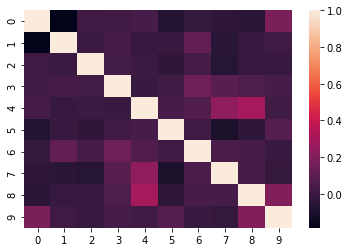

Key:
0 That is _court_ .
1 " Yes , sir , I did indeed ; and I am very much obliged by your kind solicitude about me ."
2 " How much his business engrosses him already is very plain from the circumstance of his forgetting to inquire for the book you recommended .
3 To restrain him as much as might be , by her own manners , she was immediately preparing to speak with exquisite calmness and gravity of the weather and the night ; but scarcely had she begun , scarcely had they passed the sweep - gate and joined the other carriage , than she found her subject cut up  her hand seized  her attention demanded , and Mr . Elton actually making violent love to her : availing himself of the precious opportunity , declaring sentiments which must be already well known , hoping  fearing  adoring  ready to die if she refused him ; but flattering himself that his ardent attachment and unequalled love and unexampled passion could not fail of having some effect , and in short , very much resolved on being

In [7]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])

In [8]:
X_test_lsa = lsa.fit_transform(X_test_tfidf)

variance_explained_for_test=svd.explained_variance_ratio_
total_variance_test = variance_explained_for_test.sum()
print("Percent variance captured by all components:",total_variance_test*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_test_lsa,index=X_test)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])

Percent variance captured by all components: 49.383892003660925
Component 0:
" Oh !     0.999921
" Oh !     0.999921
" Oh !     0.999921
" Oh !     0.999921
" Oh !"    0.999921
" Oh !     0.999921
" Oh !     0.999921
" Oh !     0.999921
" Oh !     0.999921
" Oh !     0.999921
Name: 0, dtype: float64
Component 1:
" Well , Mrs . Weston ," said Emma triumphantly when he left them , " what do you say now to Mr . Knightley ' s marrying Jane Fairfax ?"                                                                                                                                                                                                                                                                                                             0.612098
After tea , Mr . and Mrs . Weston , and Mr . Elton sat down with Mr . Woodhouse to cards .                                                                                                                                                      

Name: 4, dtype: float64


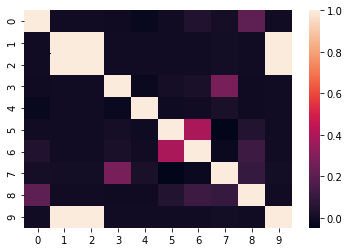

Key:
0 Mr . Woodhouse had so completely made up his mind to the visit , that in spite of the increasing coldness , he seemed to have no idea of shrinking from it , and set forward at last most punctually with his eldest daughter in his own carriage , with less apparent consciousness of the weather than either of the others ; too full of the wonder of his own going , and the pleasure it was to afford at Randalls to see that it was cold , and too well wrapt up to feel it .
1 " Oh !
2 " Oh no , no !
3 Such was Jane Fairfax ' s history .
4 " That has been a good deal the case , my dear ; but not to the degree you mention .
5 " And I am quite serious too , I assure you ," replied Mrs . Elton gaily , " in resolving to be always on the watch , and employing my friends to watch also , that nothing really unexceptionable may pass us ."
6 " And here is Mrs . Weston and Mr . Frank Churchill too ! Quite delightful ; so many friends !"
7 " You may well class the delight , the honour , and the comfo

In [9]:
# Compute document similarity using LSA components
similarity = np.asarray(np.asmatrix(X_test_lsa) * np.asmatrix(X_test_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_test).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])